In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%cd Z:\PPMI_Data\Excels\NonMotors\The251

df1 = pd.read_csv('Feats45_CategAge_APPRDX_Gender.csv')
df2 = pd.read_csv('PATNO_HYS.csv')
df = pd.merge(df2, df1, how='inner', on = 'PATNO')
df.to_csv('Feats45_CategAge_APPRDX_HYS.csv', index = False)
df.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251


PATNO  HYS  Gender        Age  APPRDX  Benton  Clock  COGSTATE  Epworth  \
0   3010    2       1  46.965716       1       0      1         0        0   
1   3024    2       1  52.743888       1       0      0         0        1   

   Geriatric_Depression  ...  SCOPA_Sex  Semantic  Education  Hand  STAIS  \
0                     1  ...          0         2          1     0      0   
1                     0  ...          0         2          1     0      0   

   STAIA  Symbol_Digit  Trail_Making_A  Trail_Making_B  UPSIT  
0      0             1               0               0      2  
1      0             1               1               1      0  

[2 rows x 50 columns]

In [6]:
df = pd.read_csv('Feats45_CategAge_APPRDX_HYS.csv')
df = df[(df['HYS'] < 4)]
df_P = df[(df['APPRDX'] == 1)]

# Healthy

In [13]:
df_H = df[(df['APPRDX'] == 2)]
df_H = df_H.drop(['PATNO','Age','Gender'], axis = 1)
df_H.head(2)

HYS  APPRDX  Benton  Clock  COGSTATE  Epworth  Geriatric_Depression  \
13    0       2       0      0         1        1                     1   
18    0       2       0      0         0        0                     0   

    Hopkins_Recall  Hopkins_Recog  LetterNumber  ...  SCOPA_Sex  Semantic  \
13               0              0             1  ...          0         0   
18               0              0             1  ...          0         1   

    Education  Hand  STAIS  STAIA  Symbol_Digit  Trail_Making_A  \
13          0     0      1      1             2               0   
18          1     0      1      1             1               0   

    Trail_Making_B  UPSIT  
13               0      0  
18               1      1  

[2 rows x 47 columns]

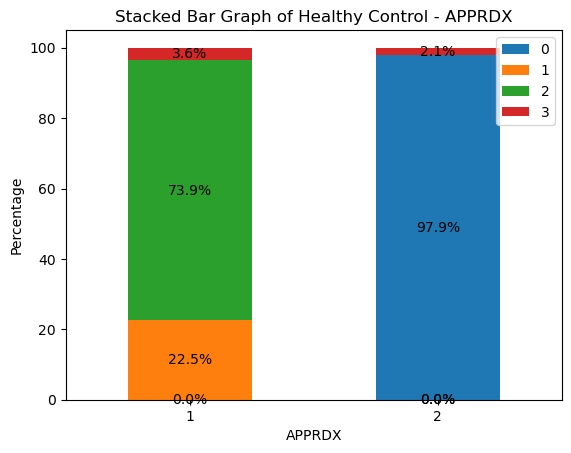

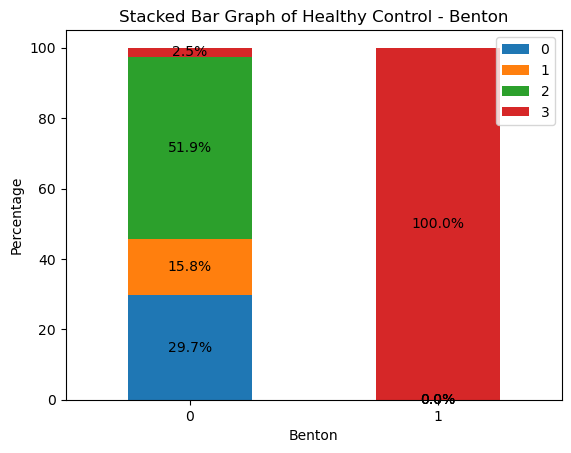

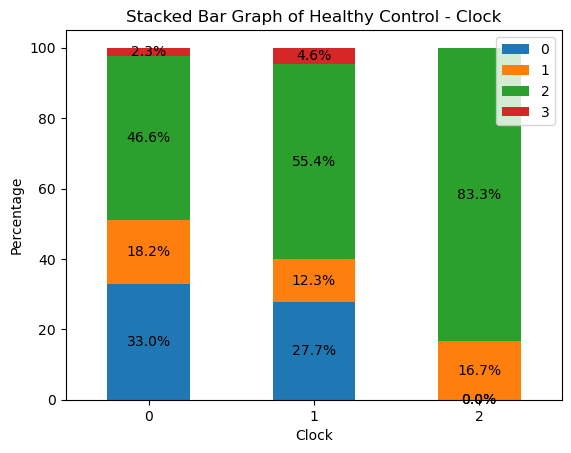

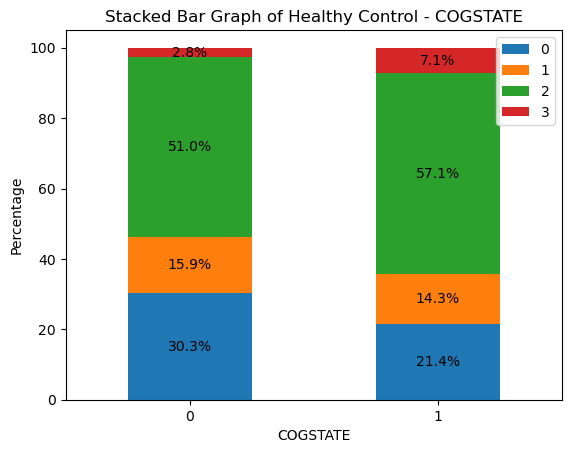

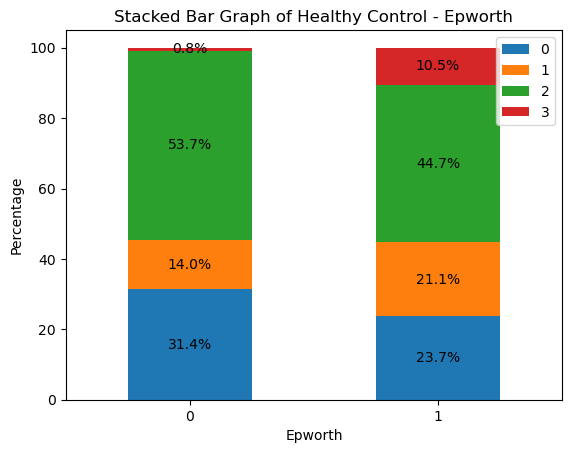

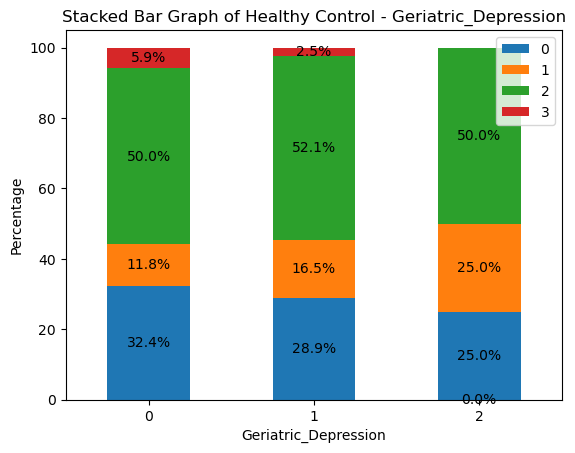

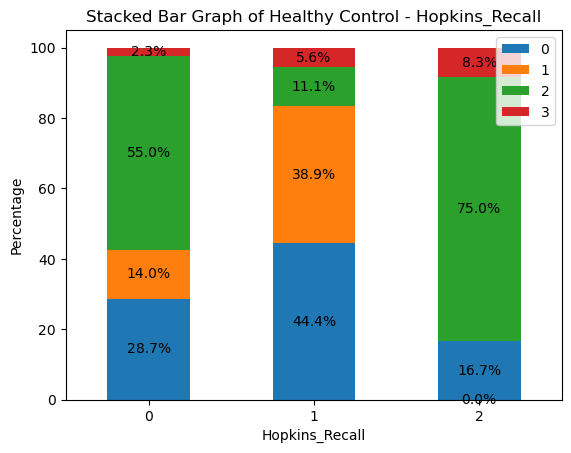

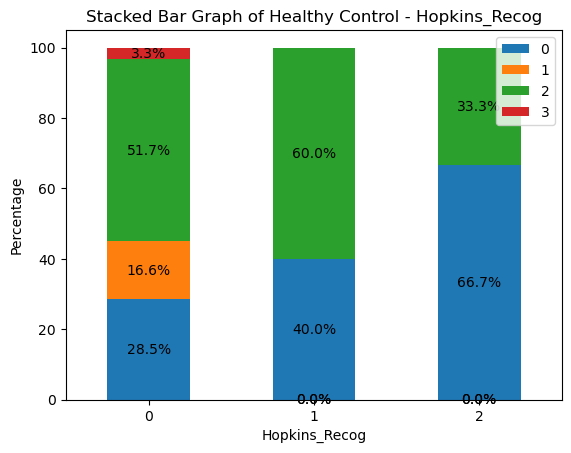

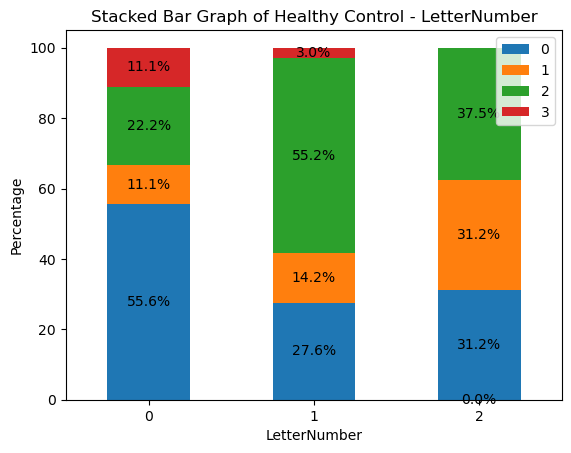

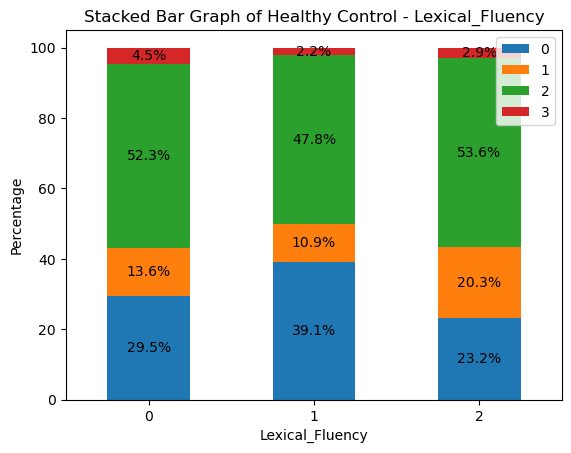

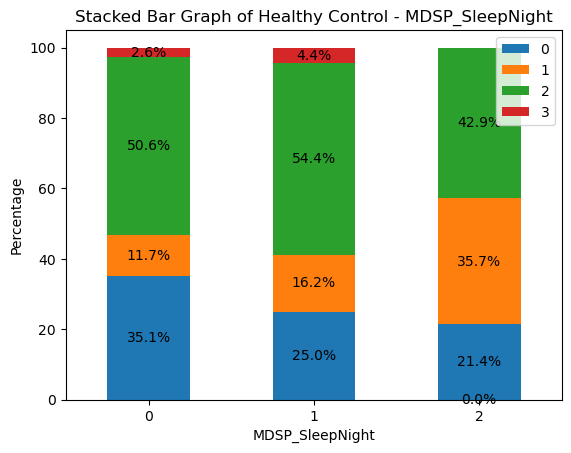

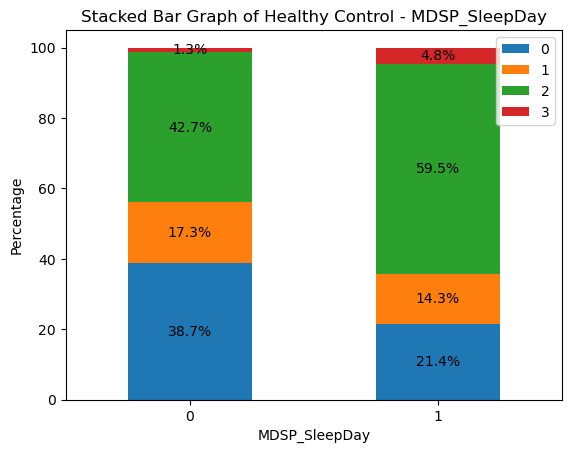

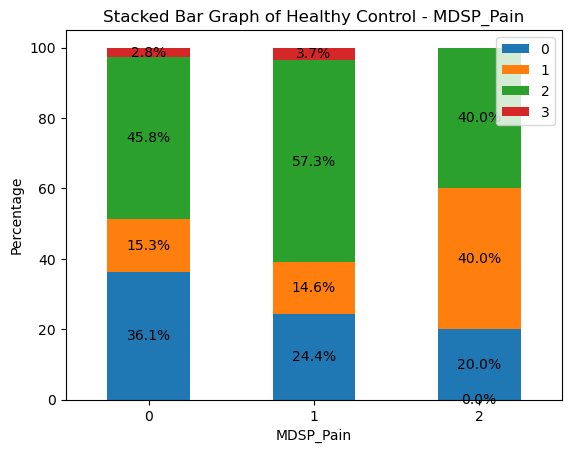

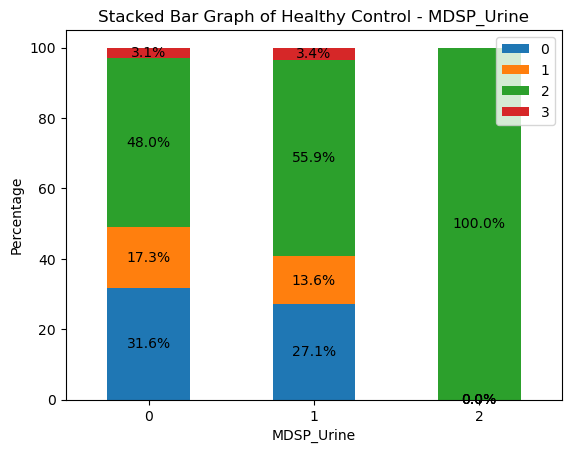

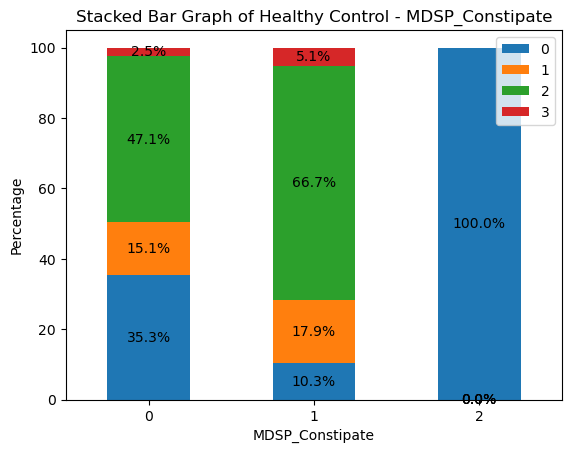

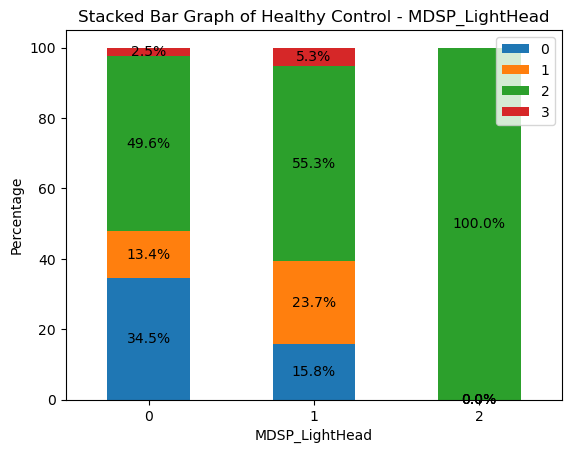

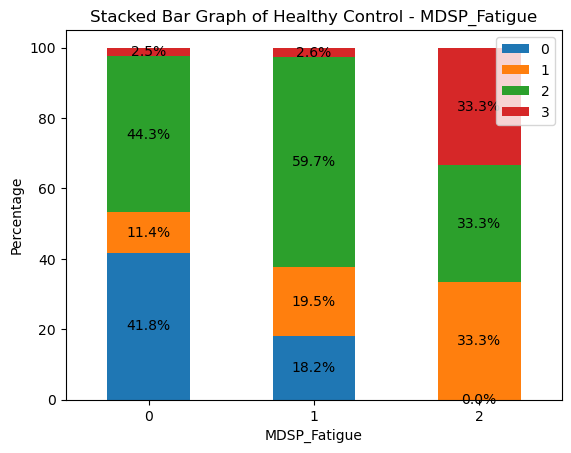

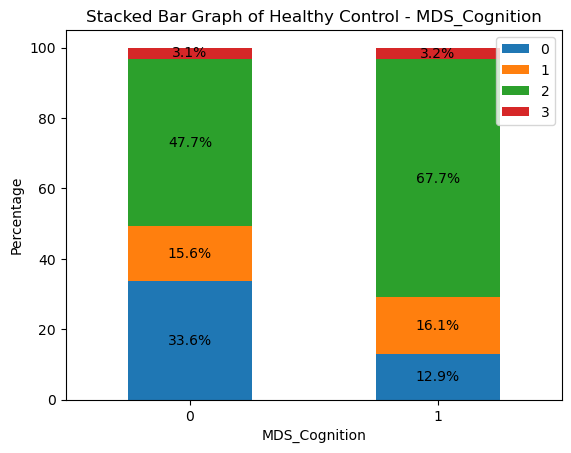

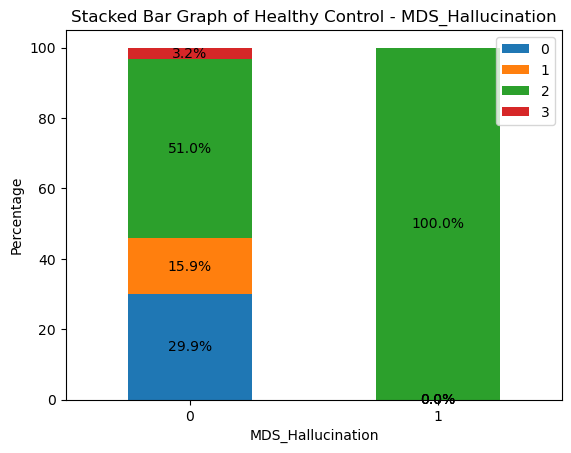

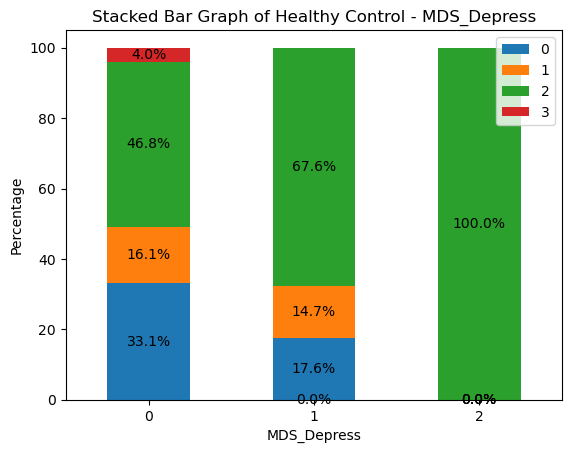

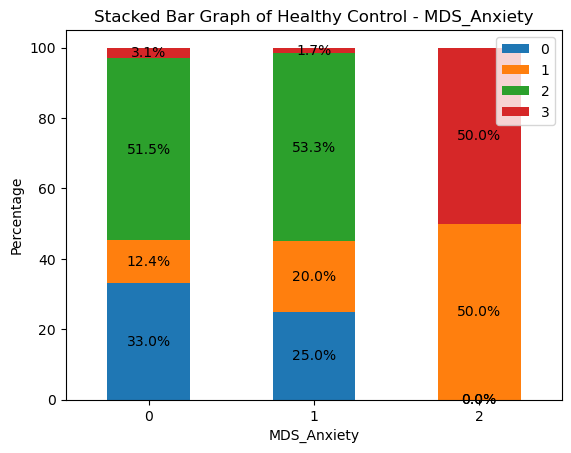

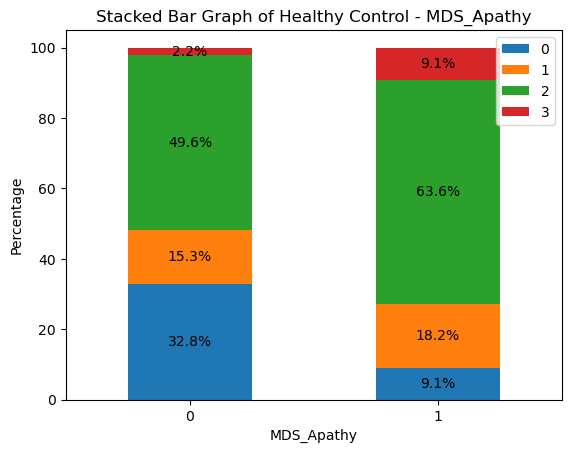

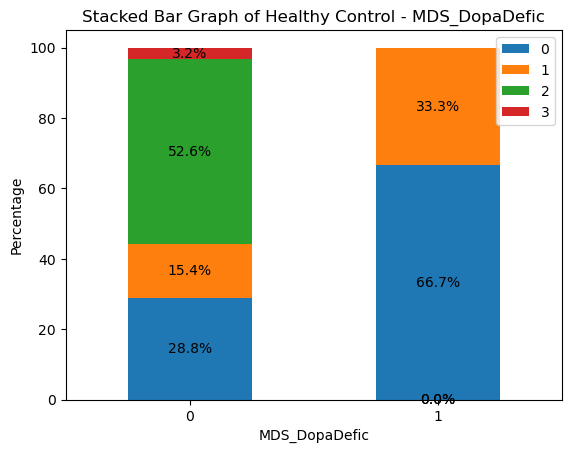

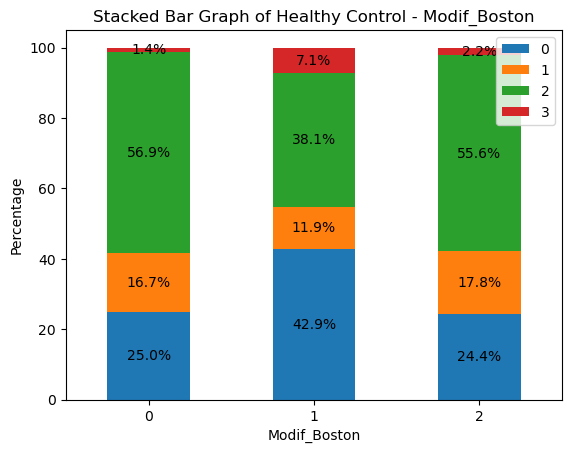

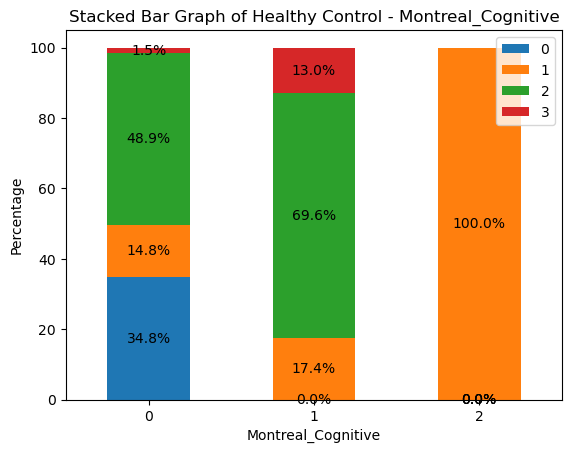

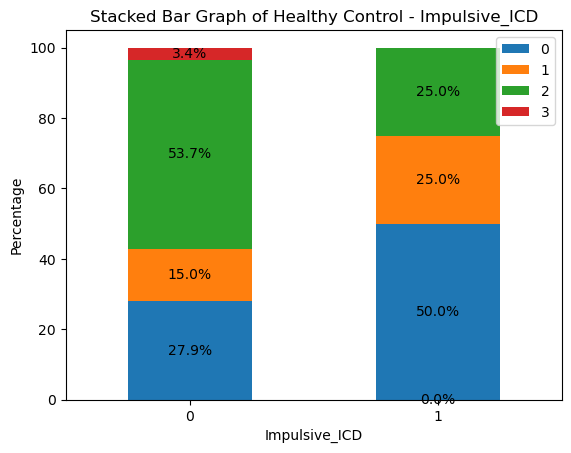

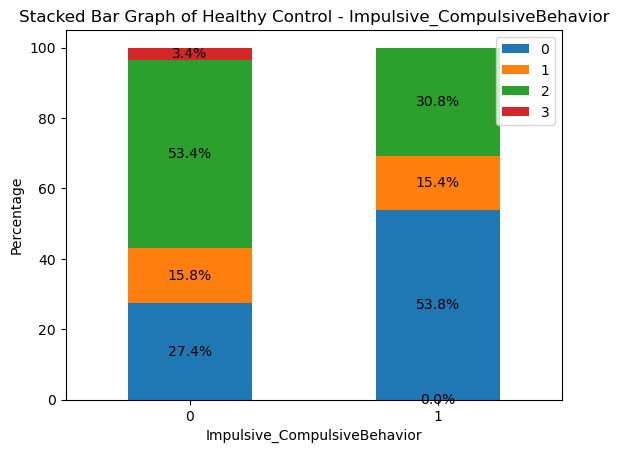

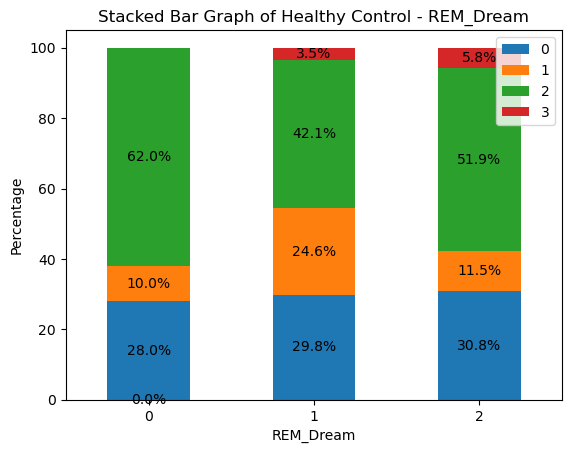

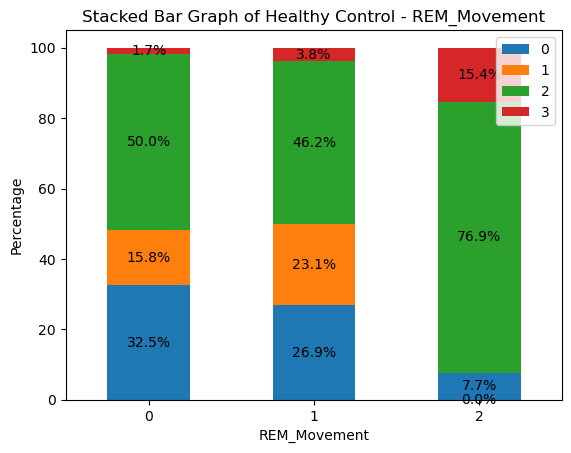

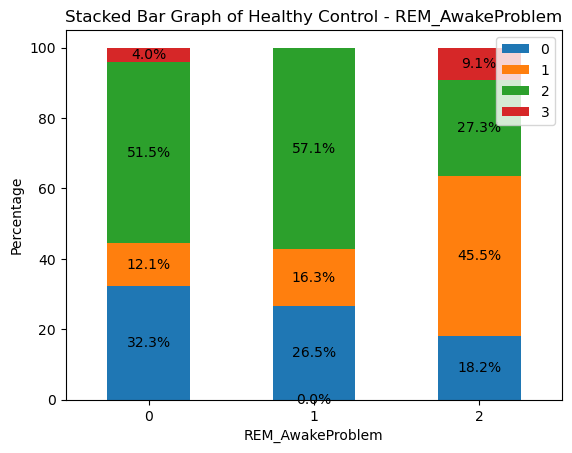

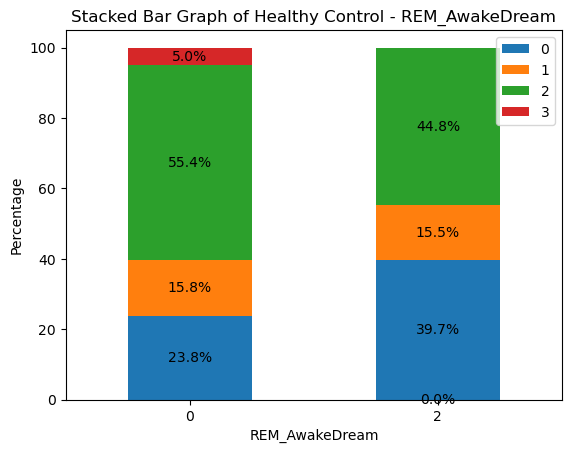

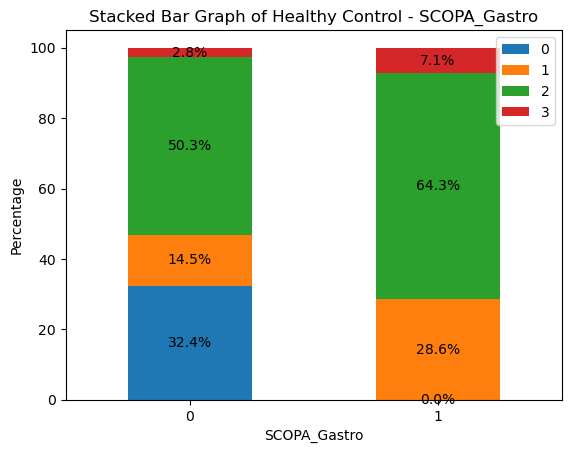

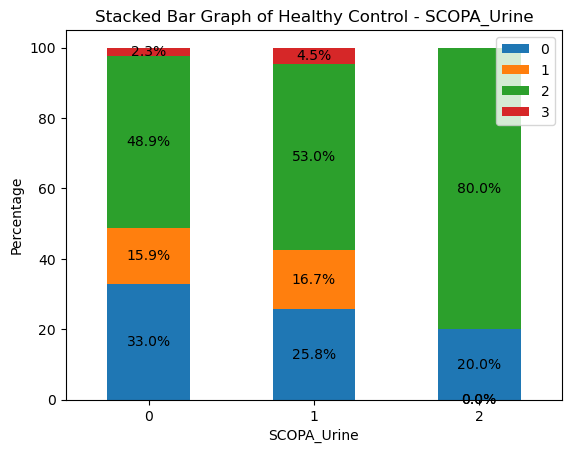

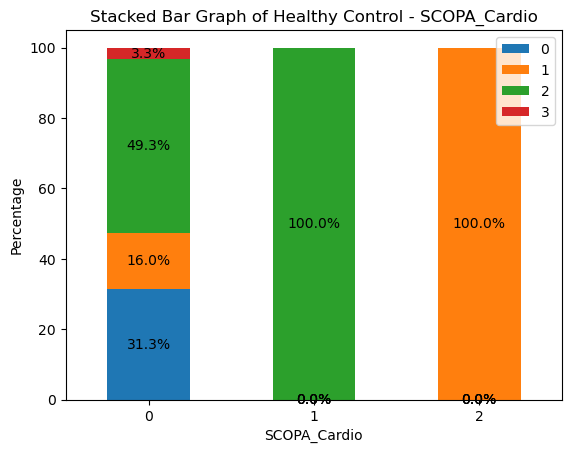

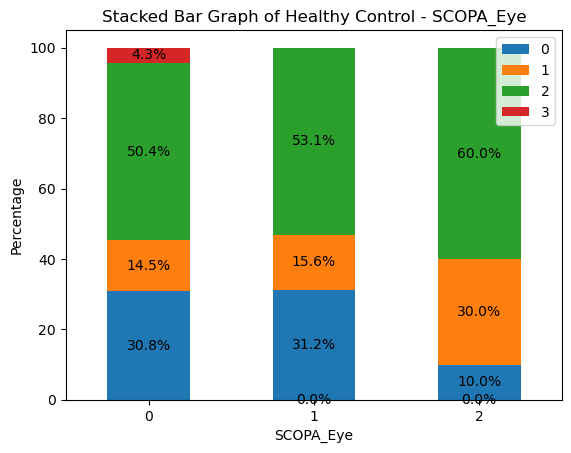

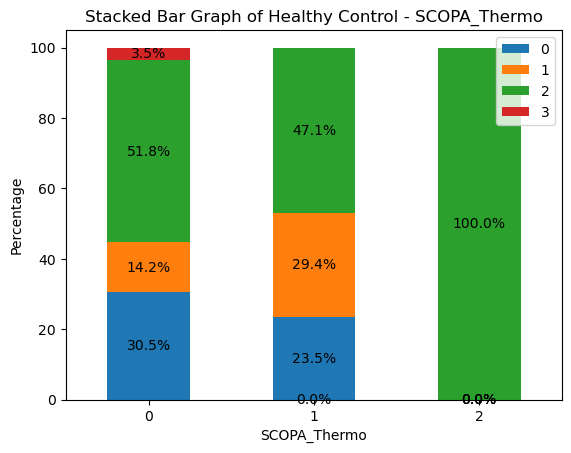

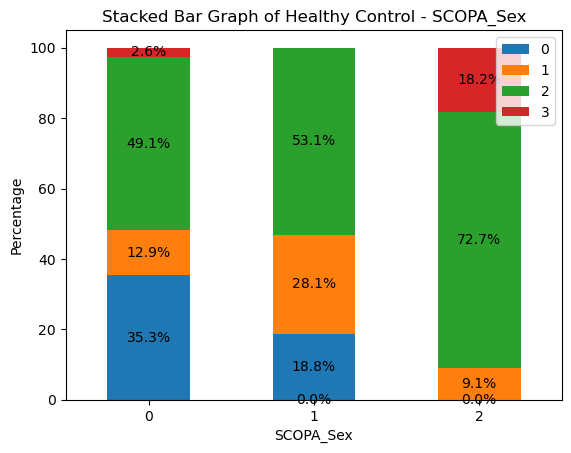

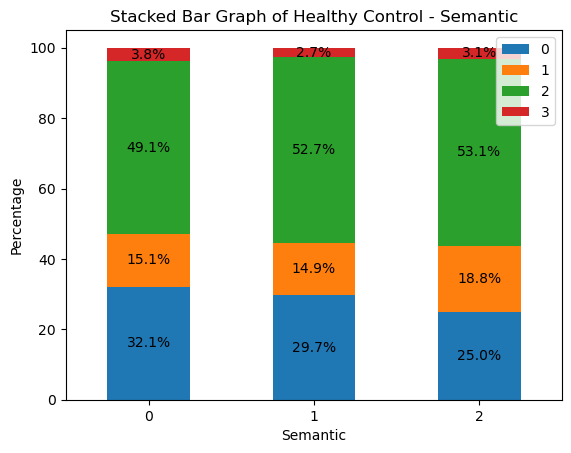

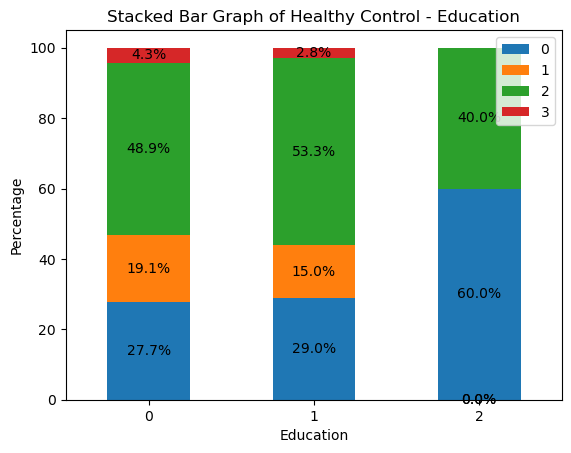

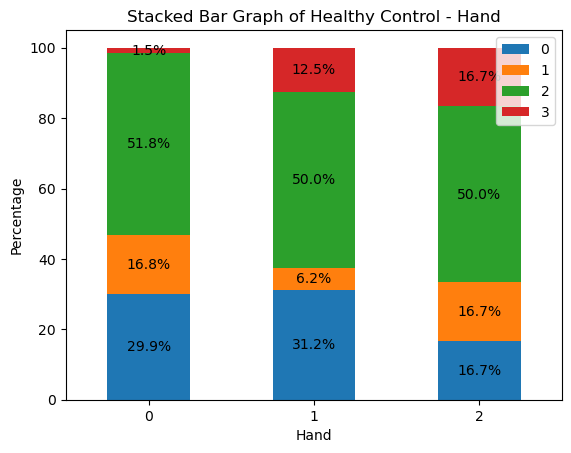

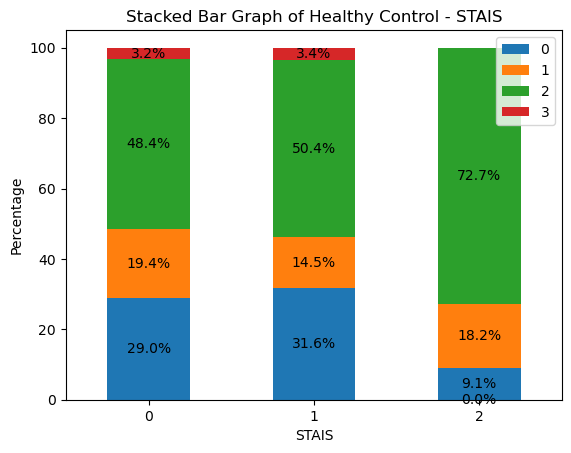

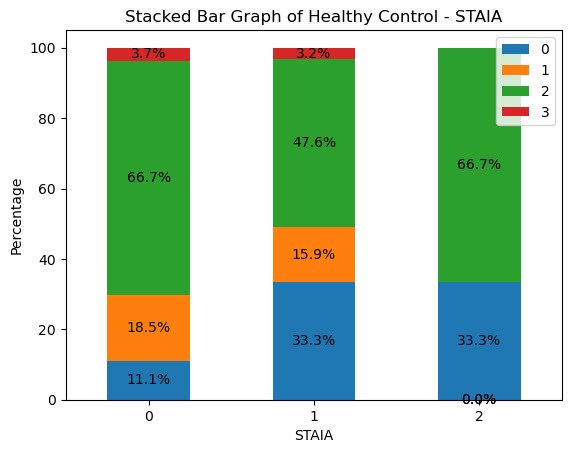

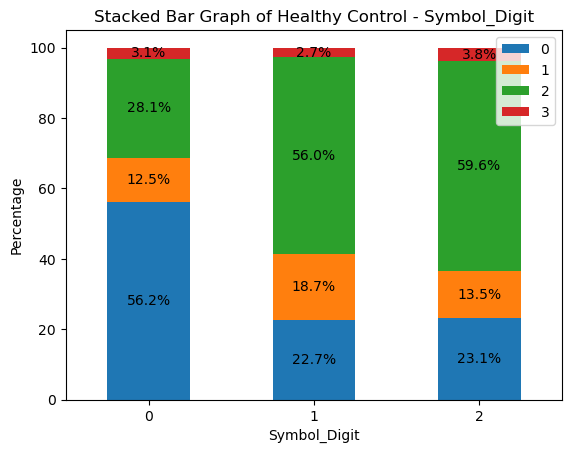

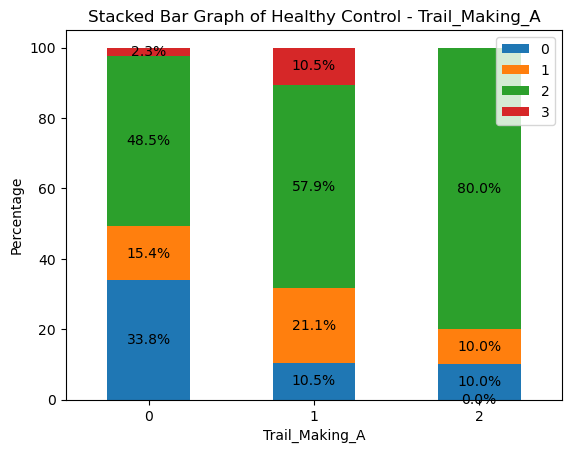

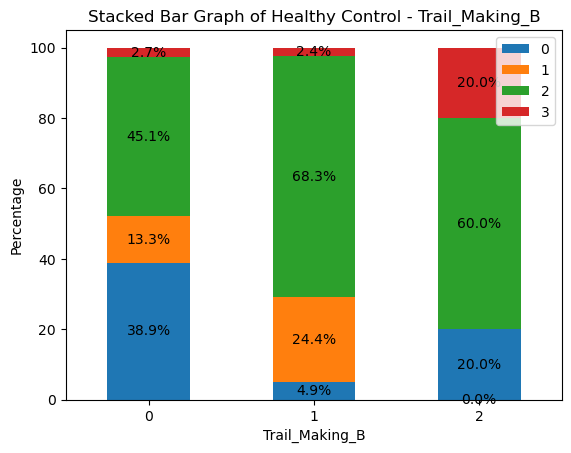

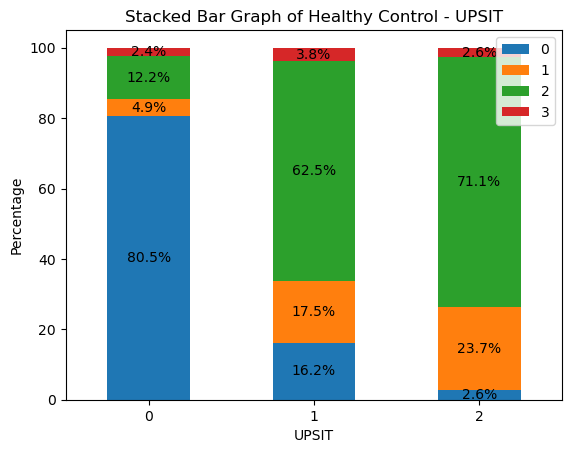

Most occurred 'HYS' for each column:
            Column HYS Count  count
1           APPRDX   2   NaN   82.0
3           APPRDX   0   NaN   47.0
2           Benton   2   NaN   82.0
4           Benton   3   NaN    1.0
2            Clock   2   NaN   41.0
..             ...  ..   ...    ...
6   Trail_Making_B   2   NaN   28.0
9   Trail_Making_B   2   NaN    3.0
0            UPSIT   0   NaN   33.0
6            UPSIT   2   NaN   50.0
10           UPSIT   2   NaN   27.0

[125 rows x 4 columns]


In [29]:
# Get unique values of the independent variables
independent_vars = df_H.columns[1:]

# Create an empty DataFrame to store the most occurred 'HYS' values
most_occurred_hys_df = pd.DataFrame(columns=['Column', 'HYS', 'Count'])

# Iterate over each column
for col in independent_vars:
    # Group the DataFrame by the independent variable and 'HYS', and count occurrences
    counts = df.groupby([col, 'HYS']).size().reset_index(name='count')
    
    # Find the maximum count for each value of the independent variable
    max_counts = counts.groupby(col)['count'].idxmax()
    
    # Get the corresponding 'HYS' values with the maximum count
    most_occurred_hys = counts.loc[max_counts, ['HYS', 'count']]
    
    # Append the results to the most_occurred_hys_df
    most_occurred_hys['Column'] = col
    most_occurred_hys_df = pd.concat([most_occurred_hys_df, most_occurred_hys])

    # Create a stacked bar graph for the current column
    counts_pivot = counts.pivot(index=col, columns='HYS', values='count')
    # Calculate percentages
    percentages = counts_pivot.div(counts_pivot.sum(axis=1), axis=0) * 100
    
    # Plot the stacked bar graph
    fig, ax = plt.subplots()
    percentages.plot(kind='bar', stacked=True, ax=ax)
    
    # Add labels to the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')
    
    plt.legend(loc="upper right")
    plt.xticks(rotation=0)
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.title(f"Stacked Bar Graph of Healthy Control - {col}")
    plt.savefig(f"Stacked_BarGraph_HealthyControl_{col}.svg")
    plt.show()

# Print the most occurred 'HYS' values for each column
print("Most occurred 'HYS' for each column:")
print(most_occurred_hys_df)


# Patient

In [30]:
df_P = df[(df['APPRDX'] == 1)]
df_P = df_P.drop(['PATNO','Age','Gender'], axis = 1)
df_P.head(2)

HYS  APPRDX  Benton  Clock  COGSTATE  Epworth  Geriatric_Depression  \
0    2       1       0      1         0        0                     1   
1    2       1       0      0         0        1                     0   

   Hopkins_Recall  Hopkins_Recog  LetterNumber  ...  SCOPA_Sex  Semantic  \
0               0              0             1  ...          0         2   
1               0              0             1  ...          0         2   

   Education  Hand  STAIS  STAIA  Symbol_Digit  Trail_Making_A  \
0          1     0      0      0             1               0   
1          1     0      0      0             1               1   

   Trail_Making_B  UPSIT  
0               0      2  
1               1      0  

[2 rows x 47 columns]

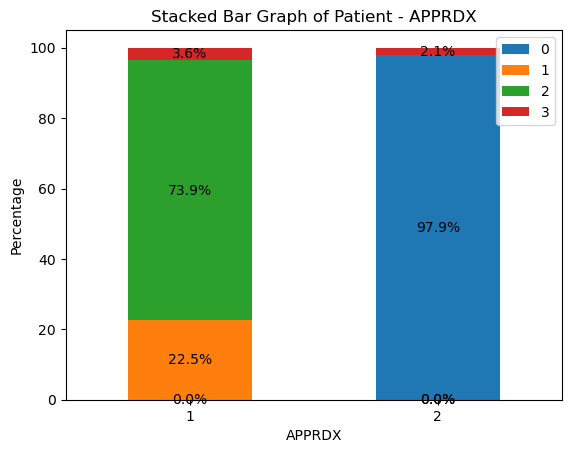

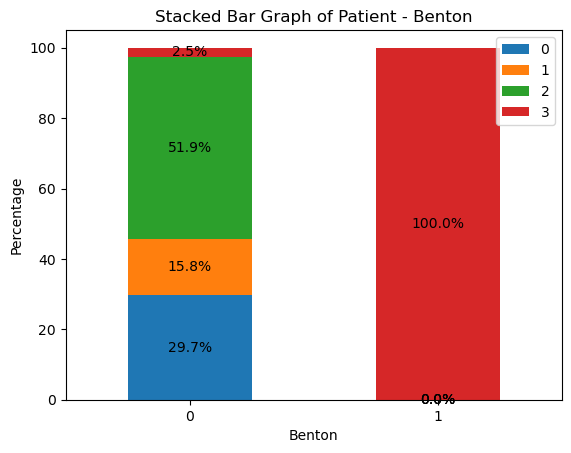

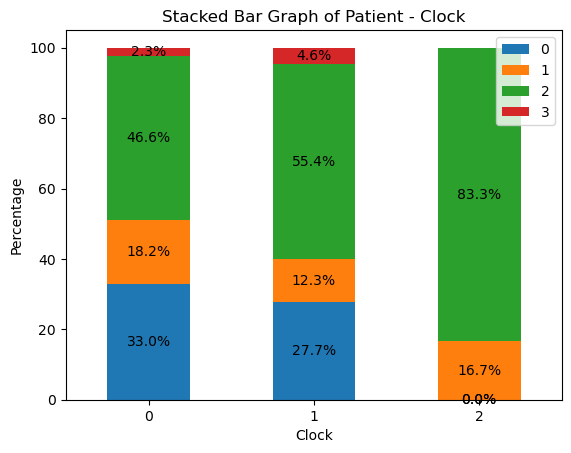

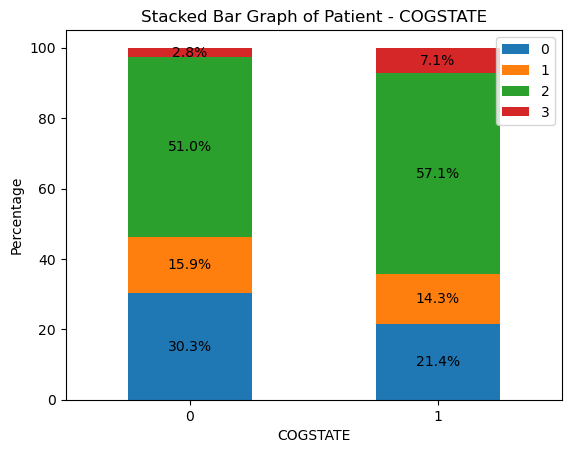

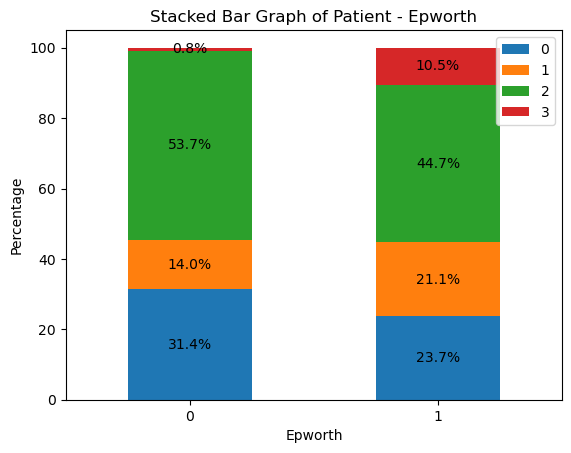

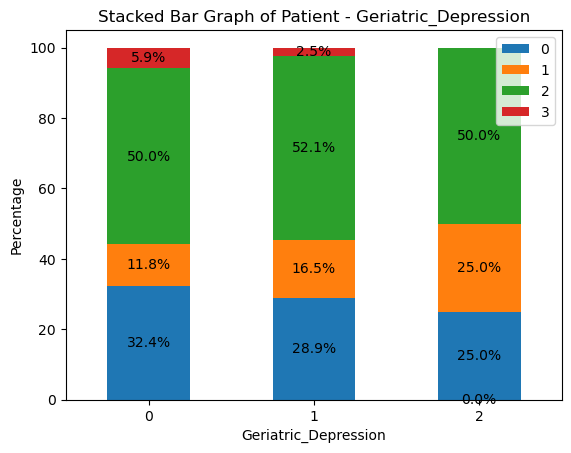

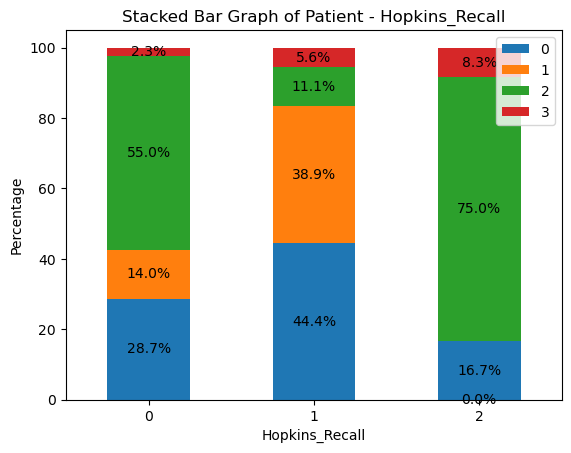

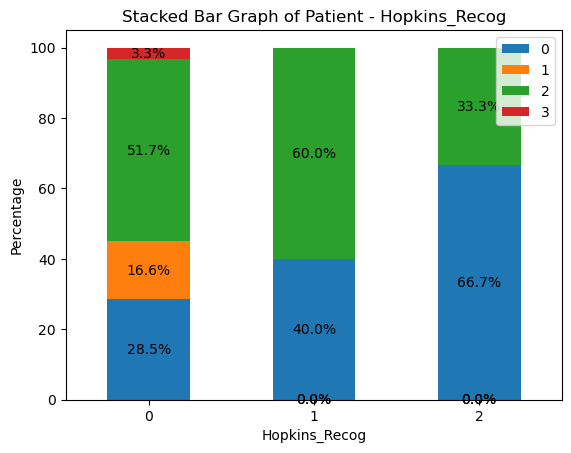

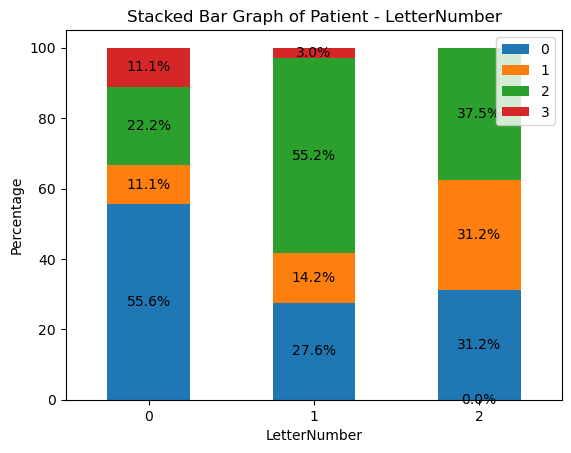

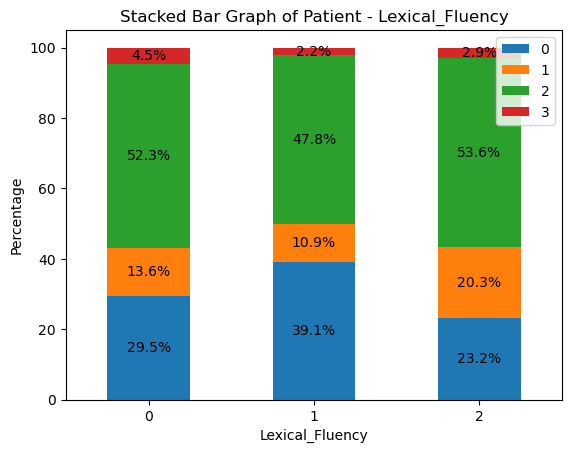

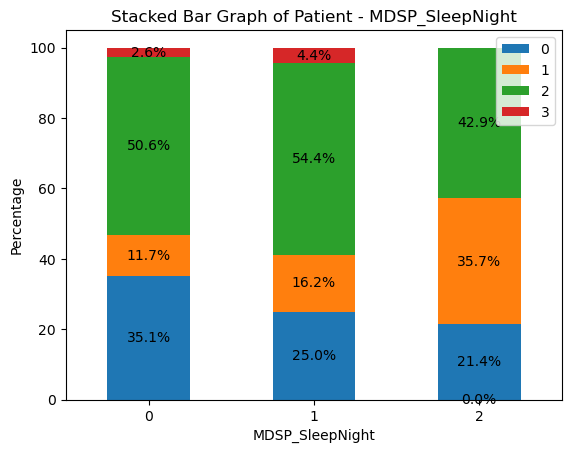

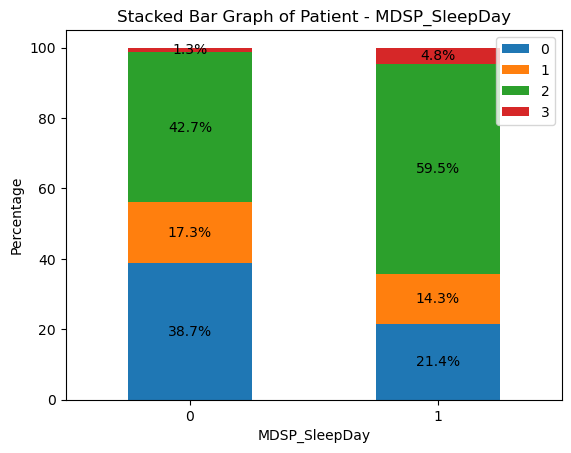

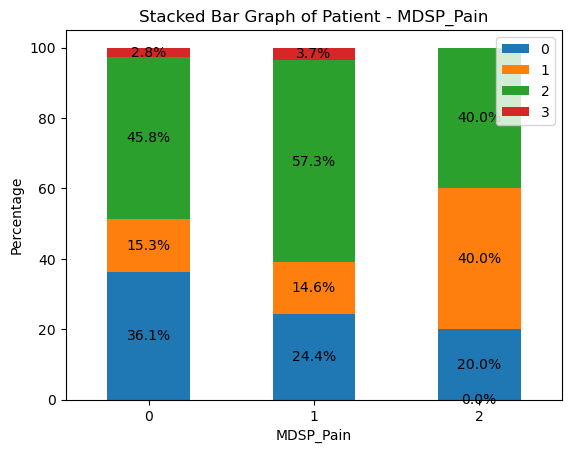

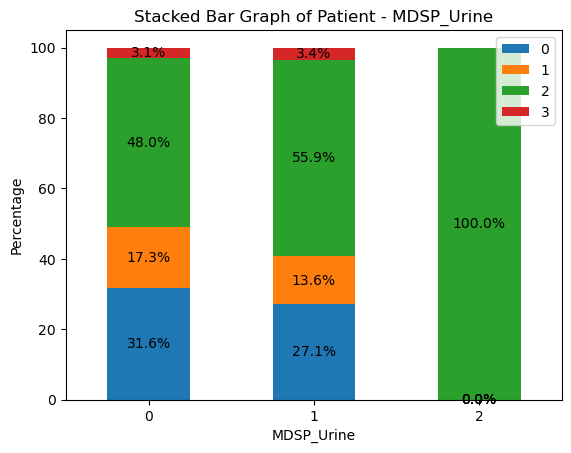

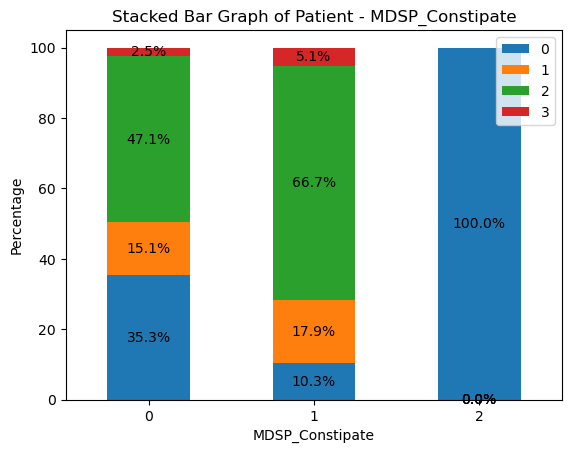

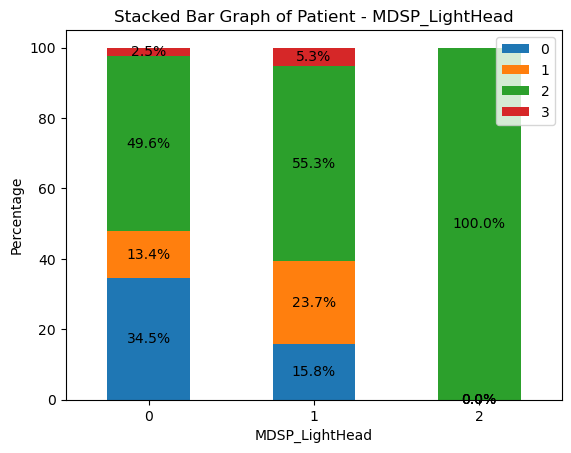

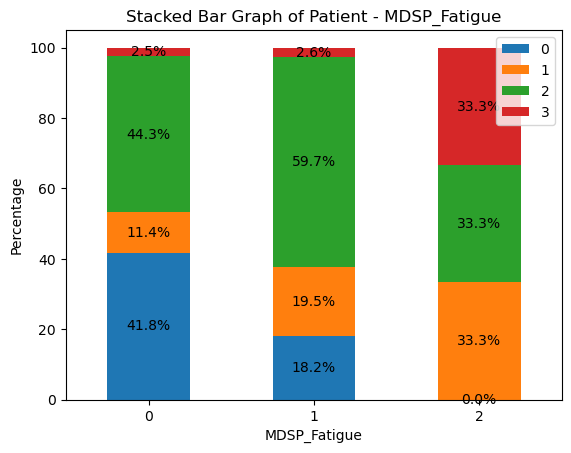

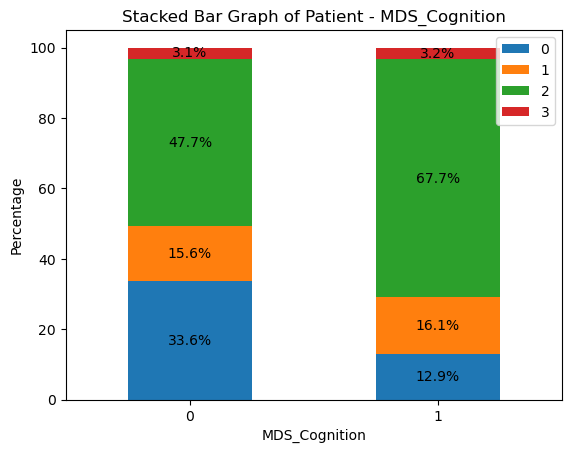

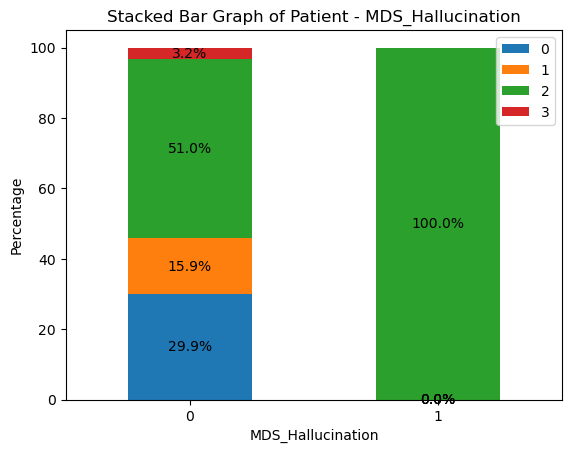

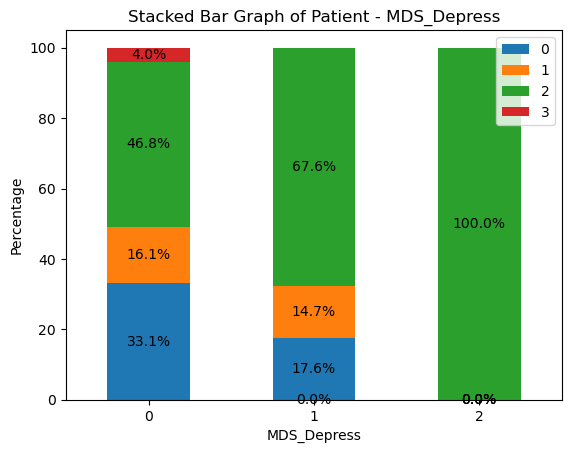

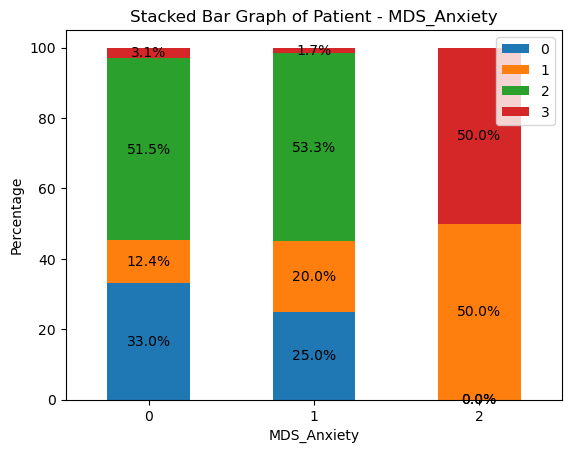

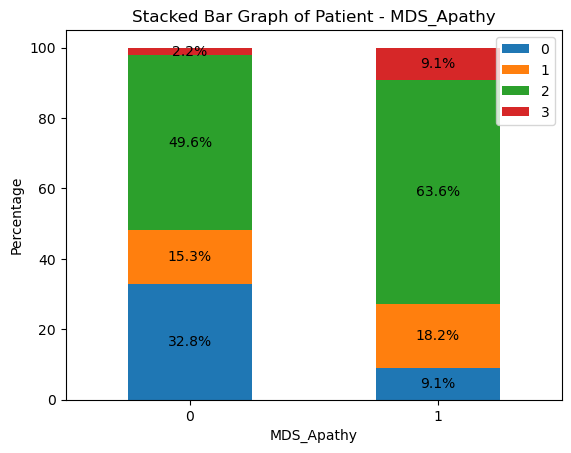

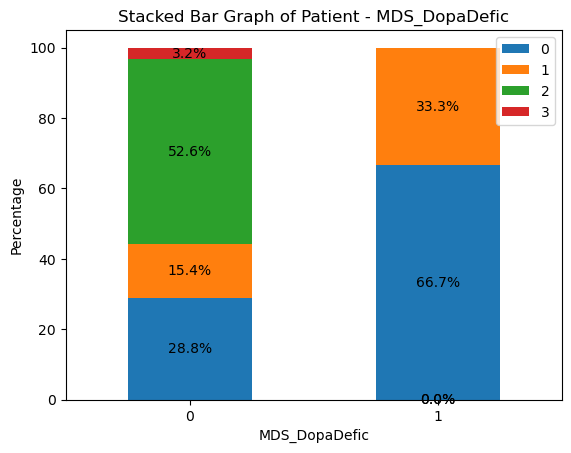

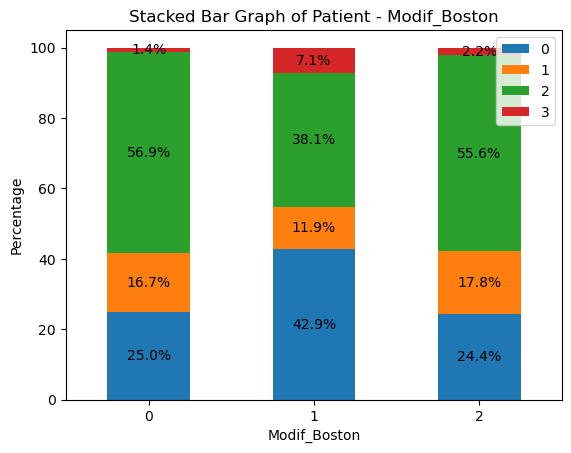

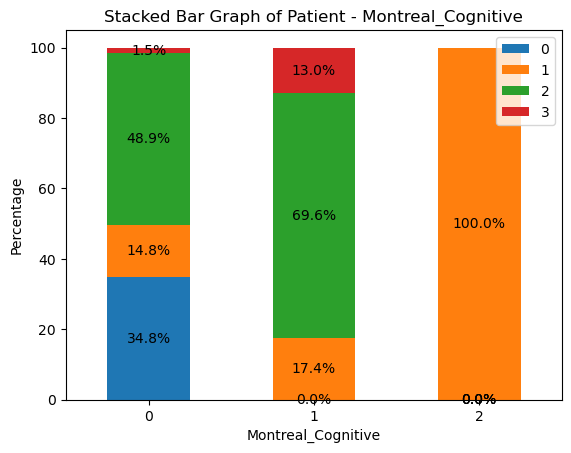

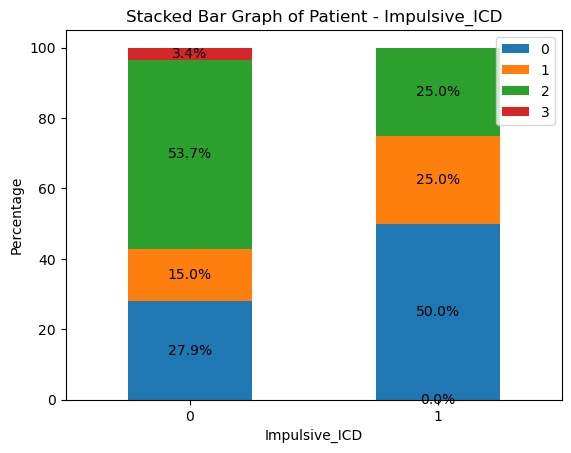

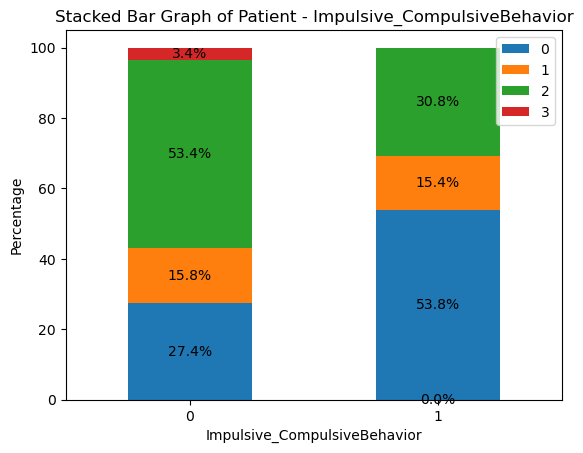

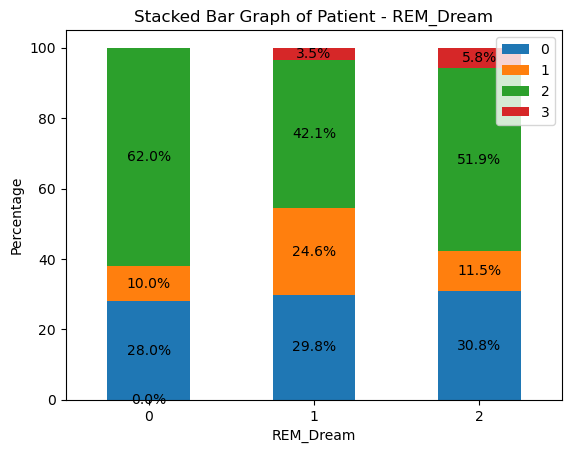

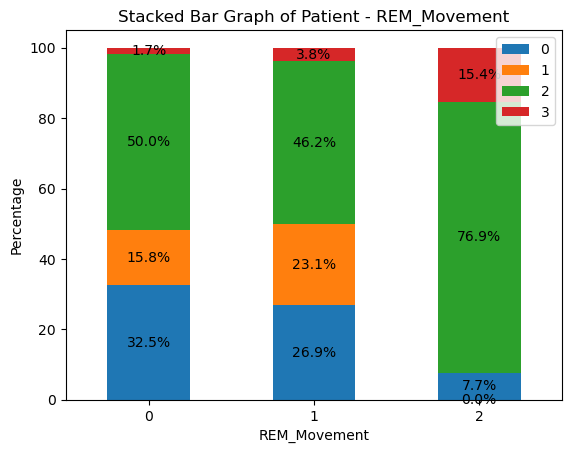

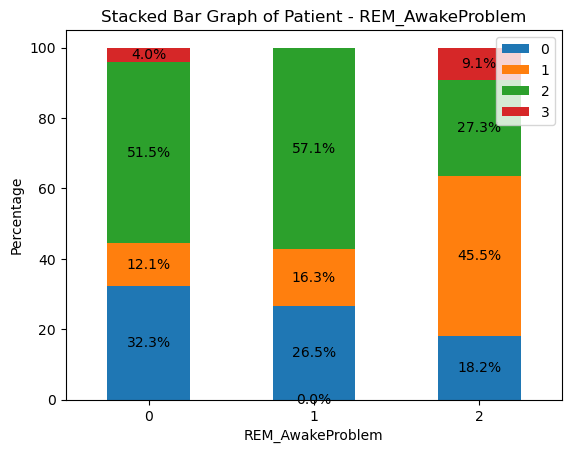

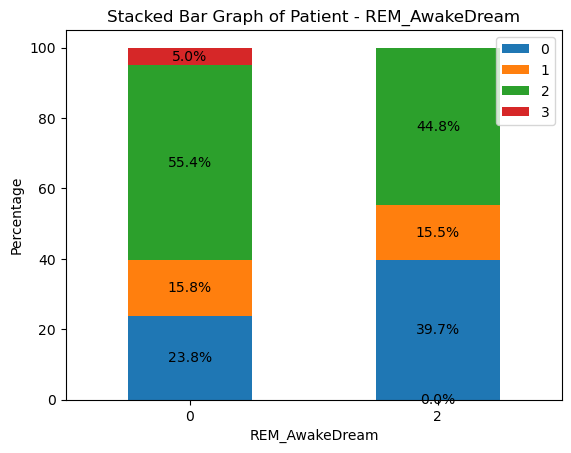

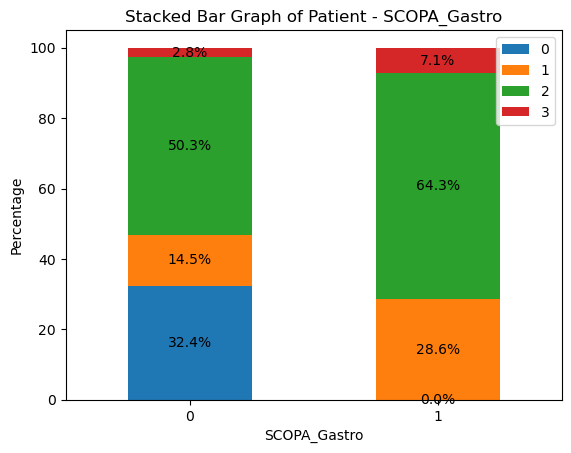

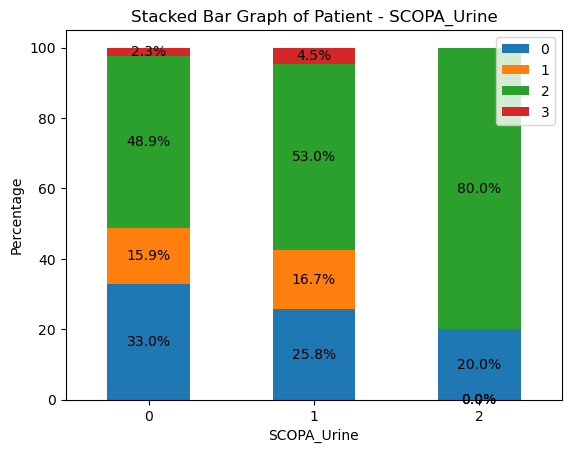

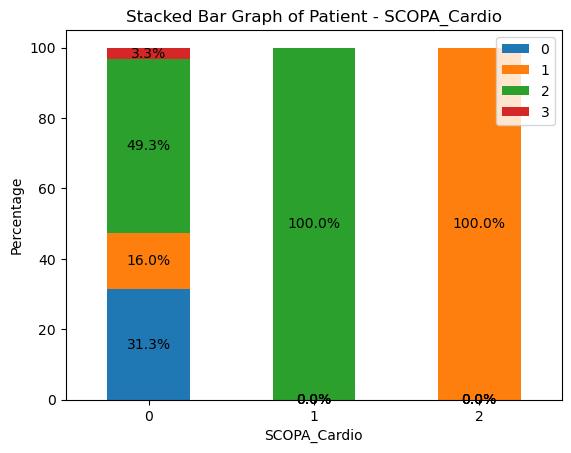

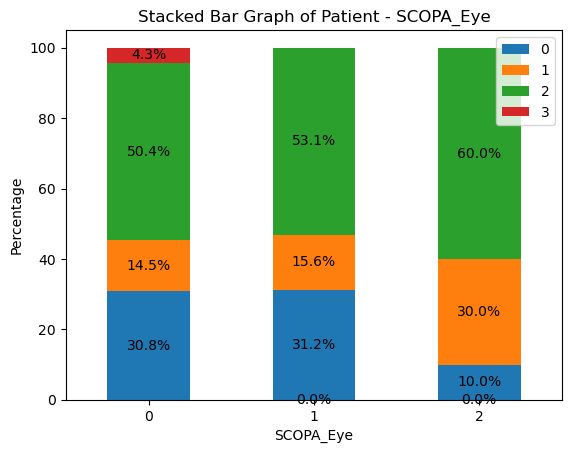

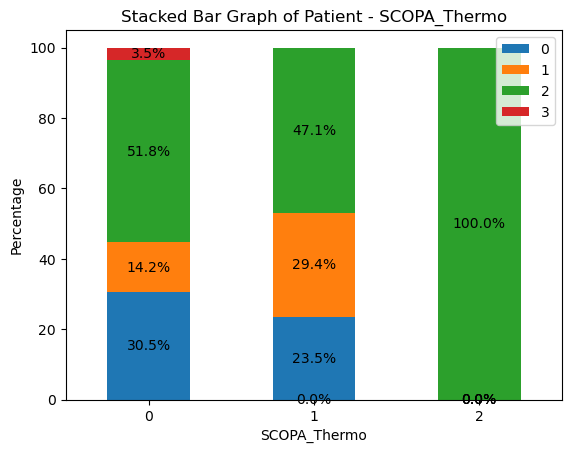

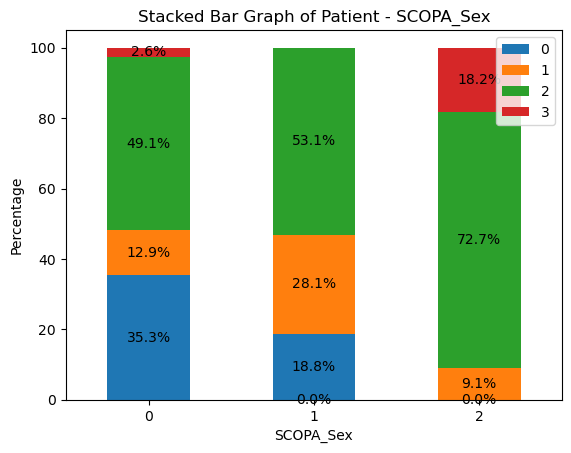

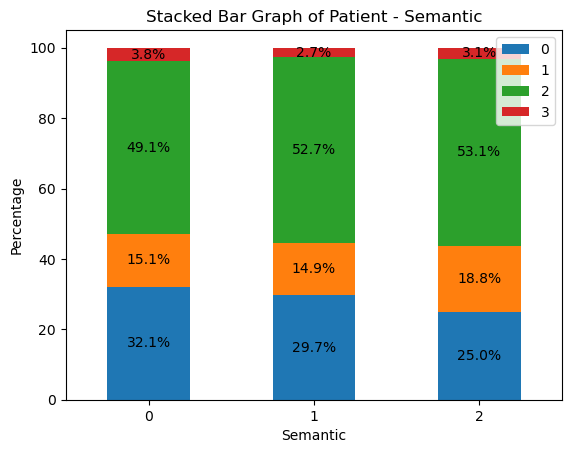

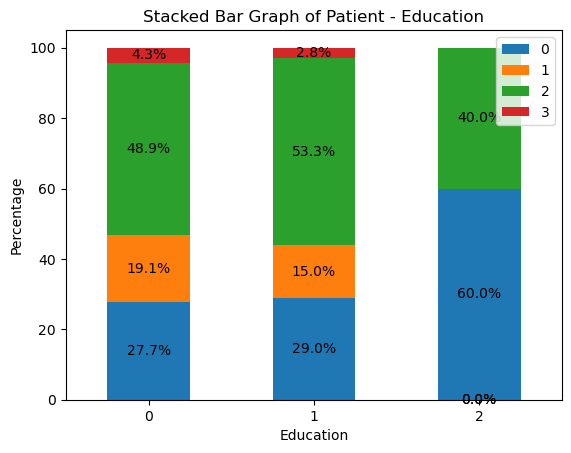

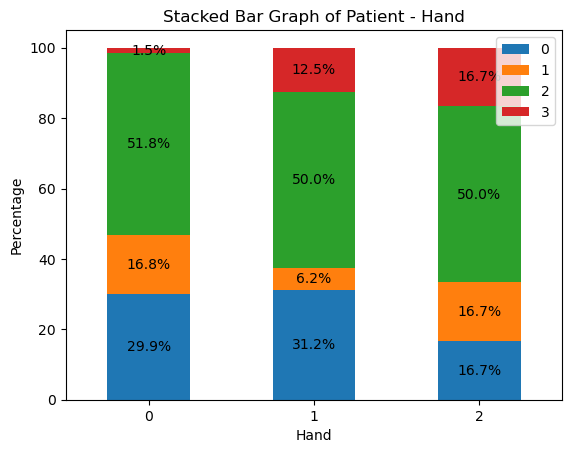

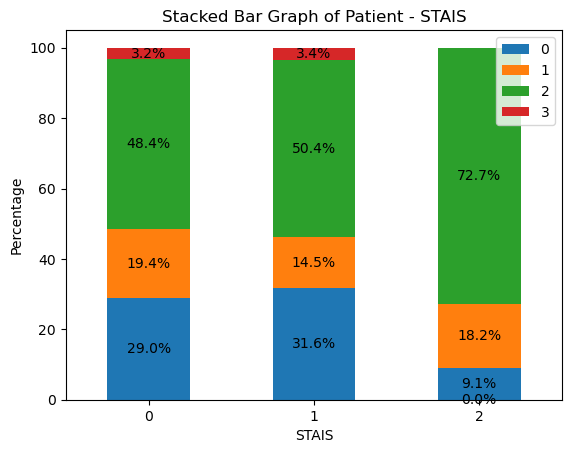

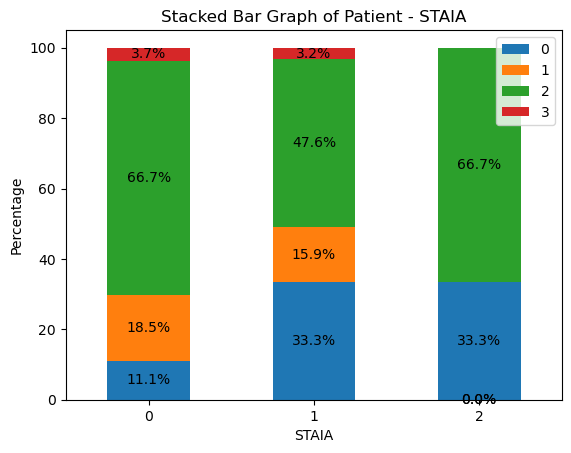

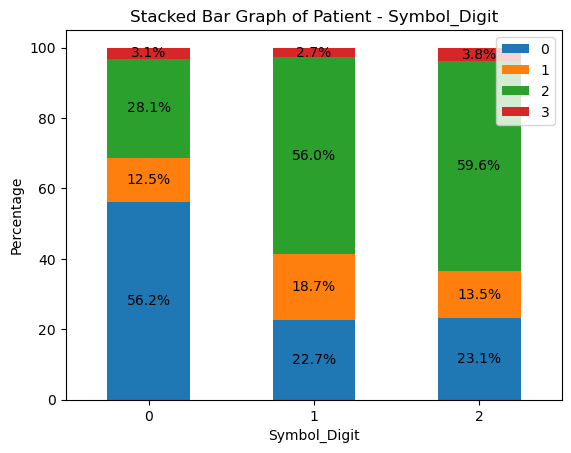

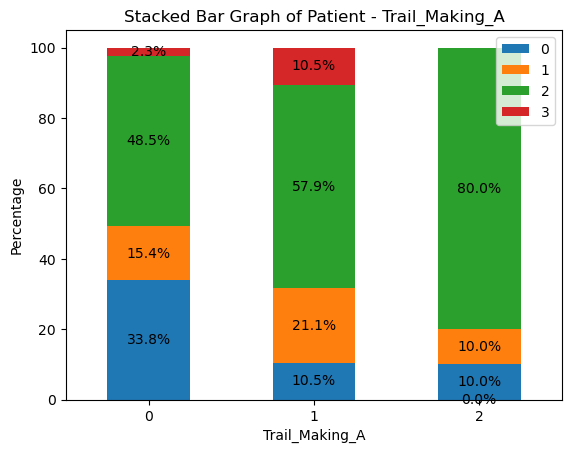

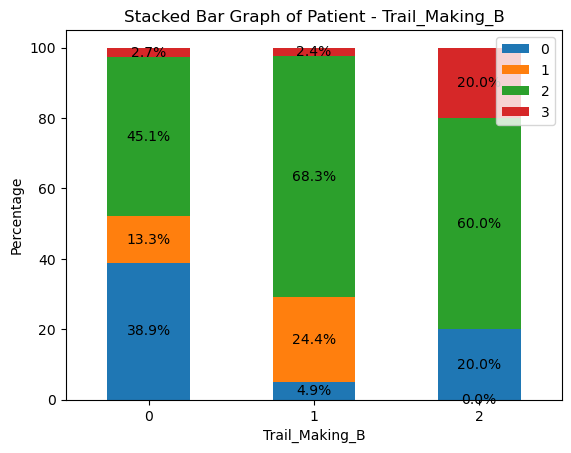

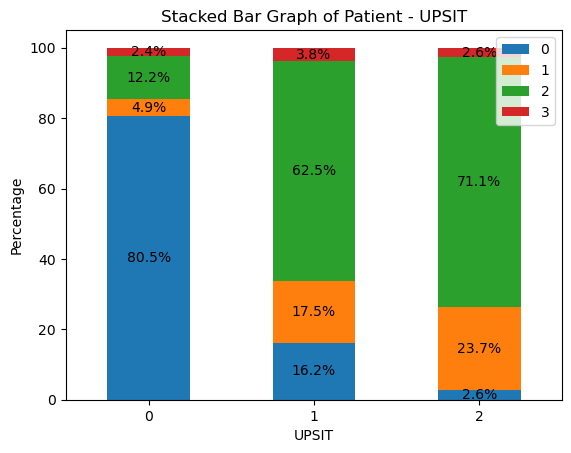

Most occurred 'HYS' for each column:
            Column HYS Count  count
1           APPRDX   2   NaN   82.0
3           APPRDX   0   NaN   47.0
2           Benton   2   NaN   82.0
4           Benton   3   NaN    1.0
2            Clock   2   NaN   41.0
..             ...  ..   ...    ...
6   Trail_Making_B   2   NaN   28.0
9   Trail_Making_B   2   NaN    3.0
0            UPSIT   0   NaN   33.0
6            UPSIT   2   NaN   50.0
10           UPSIT   2   NaN   27.0

[125 rows x 4 columns]


In [31]:
# Get unique values of the independent variables
independent_vars = df_P.columns[1:]

# Create an empty DataFrame to store the most occurred 'HYS' values
most_occurred_hys_df = pd.DataFrame(columns=['Column', 'HYS', 'Count'])

# Iterate over each column
for col in independent_vars:
    # Group the DataFrame by the independent variable and 'HYS', and count occurrences
    counts = df.groupby([col, 'HYS']).size().reset_index(name='count')
    
    # Find the maximum count for each value of the independent variable
    max_counts = counts.groupby(col)['count'].idxmax()
    
    # Get the corresponding 'HYS' values with the maximum count
    most_occurred_hys = counts.loc[max_counts, ['HYS', 'count']]
    
    # Append the results to the most_occurred_hys_df
    most_occurred_hys['Column'] = col
    most_occurred_hys_df = pd.concat([most_occurred_hys_df, most_occurred_hys])

    # Create a stacked bar graph for the current column
    counts_pivot = counts.pivot(index=col, columns='HYS', values='count')
    # Calculate percentages
    percentages = counts_pivot.div(counts_pivot.sum(axis=1), axis=0) * 100
    
    # Plot the stacked bar graph
    fig, ax = plt.subplots()
    percentages.plot(kind='bar', stacked=True, ax=ax)
    
    # Add labels to the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')
    
    plt.legend(loc="upper right")
    plt.xticks(rotation=0)
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.title(f"Stacked Bar Graph of Patient - {col}")
    plt.savefig(f"Stacked_BarGraph_Patient_{col}.svg")
    plt.show()

# Print the most occurred 'HYS' values for each column
print("Most occurred 'HYS' for each column:")
print(most_occurred_hys_df)


# Combined

In [40]:
df = df.drop(['PATNO','Age','Gender'], axis = 1)
df.head(2)

HYS  APPRDX  Benton  Clock  COGSTATE  Epworth  Geriatric_Depression  \
0    2       1       0      1         0        0                     1   
1    2       1       0      0         0        1                     0   

   Hopkins_Recall  Hopkins_Recog  LetterNumber  ...  SCOPA_Sex  Semantic  \
0               0              0             1  ...          0         2   
1               0              0             1  ...          0         2   

   Education  Hand  STAIS  STAIA  Symbol_Digit  Trail_Making_A  \
0          1     0      0      0             1               0   
1          1     0      0      0             1               1   

   Trail_Making_B  UPSIT  
0               0      2  
1               1      0  

[2 rows x 47 columns]

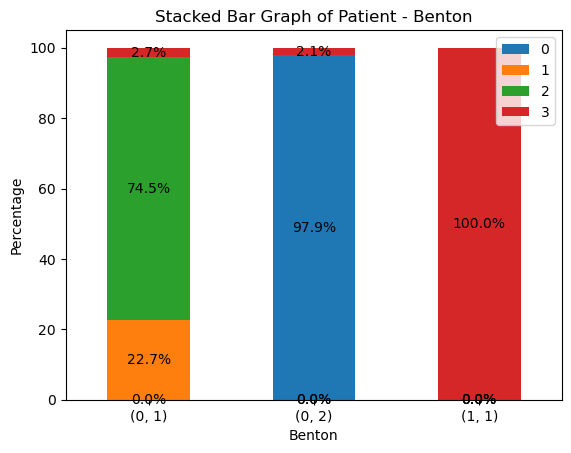

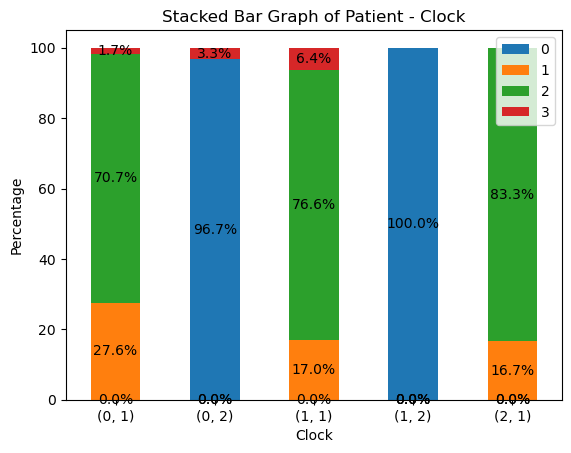

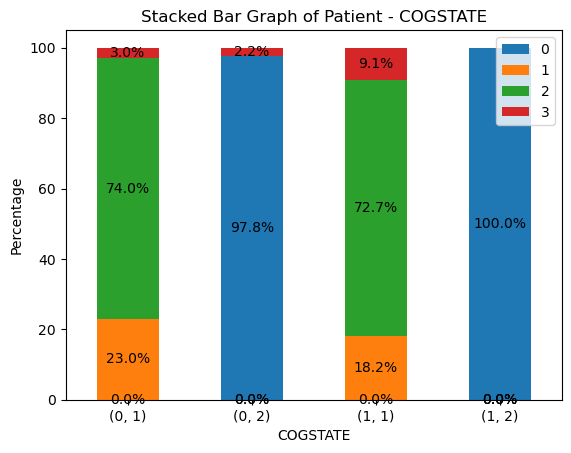

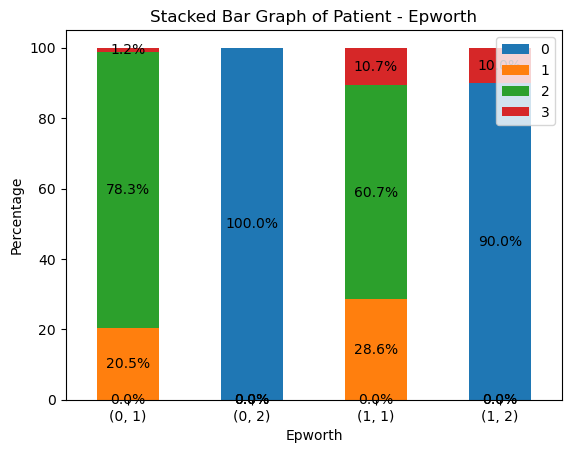

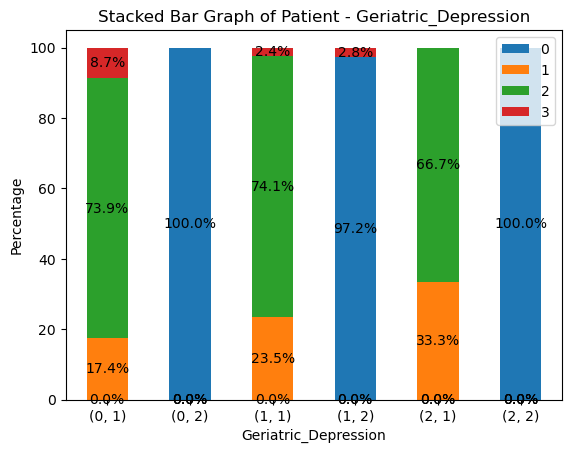

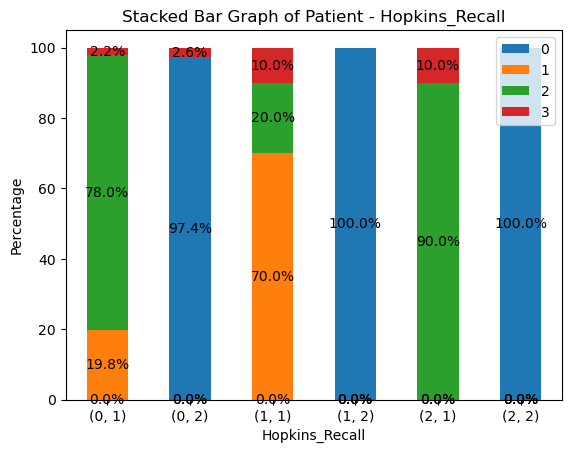

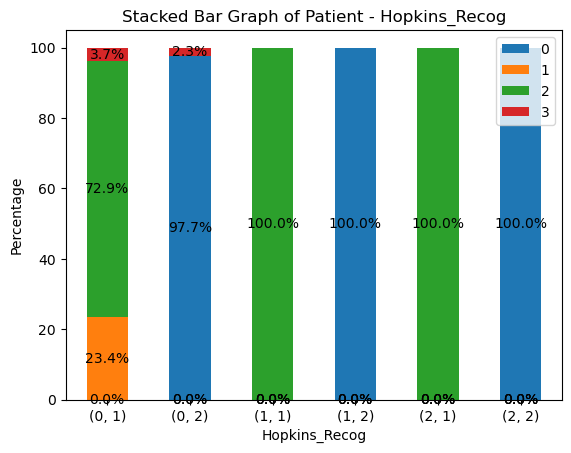

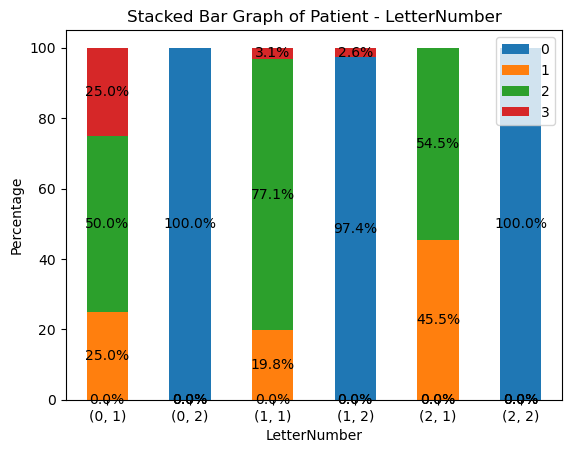

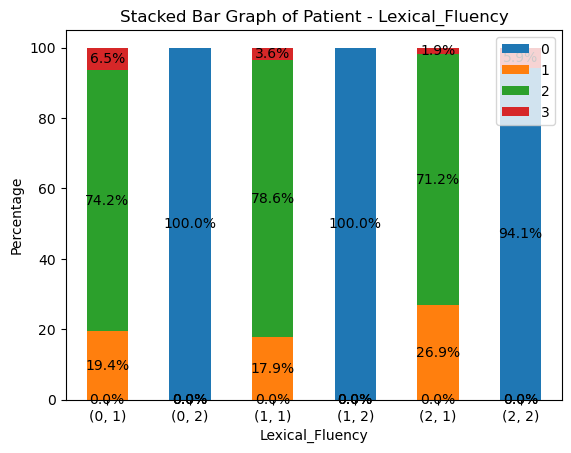

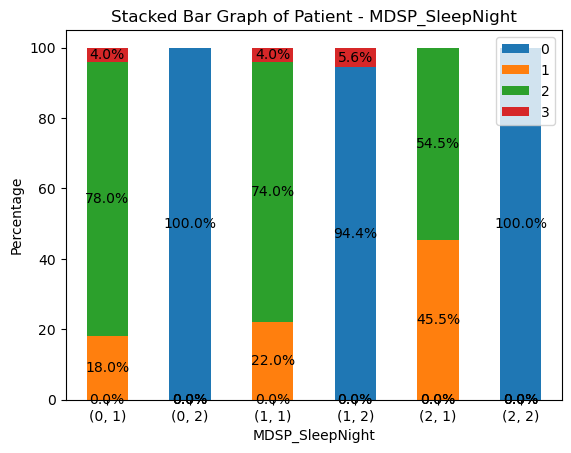

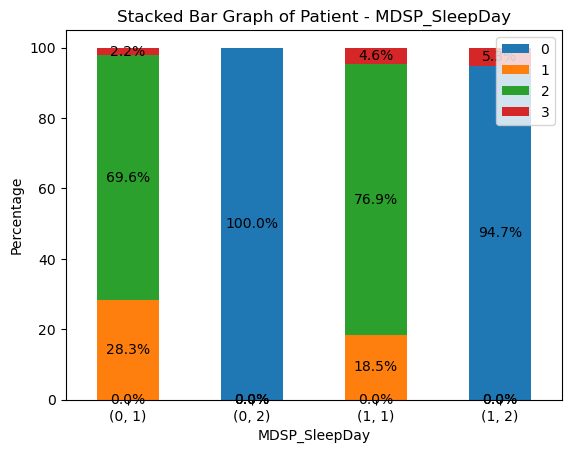

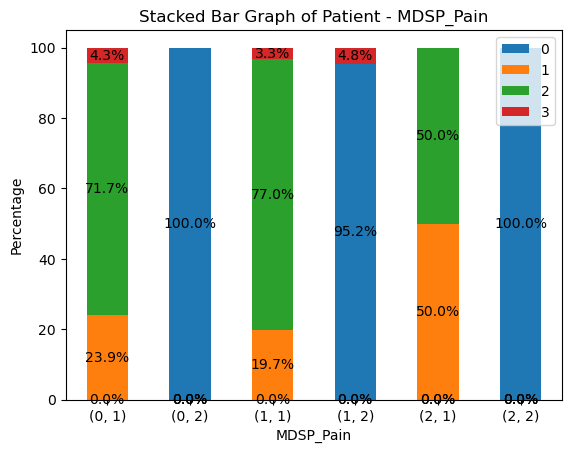

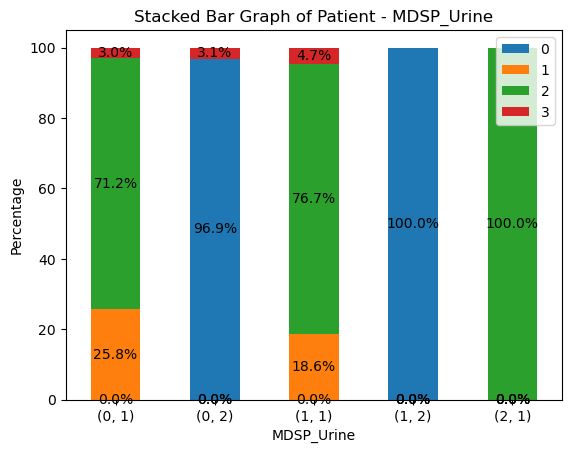

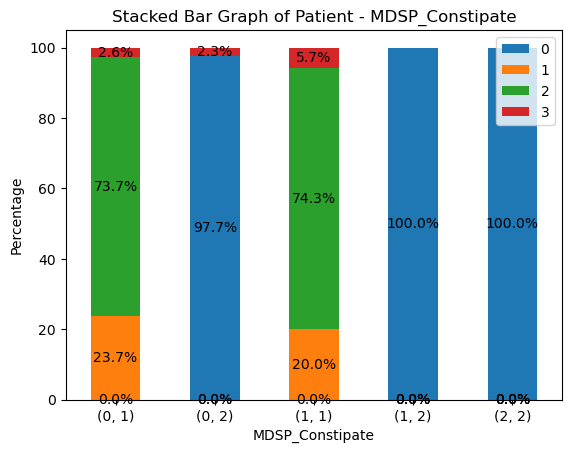

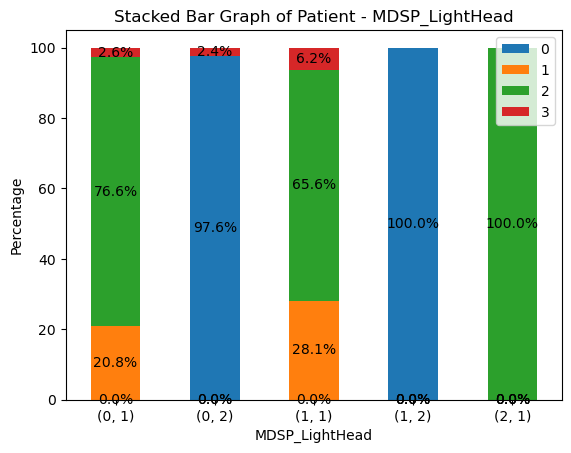

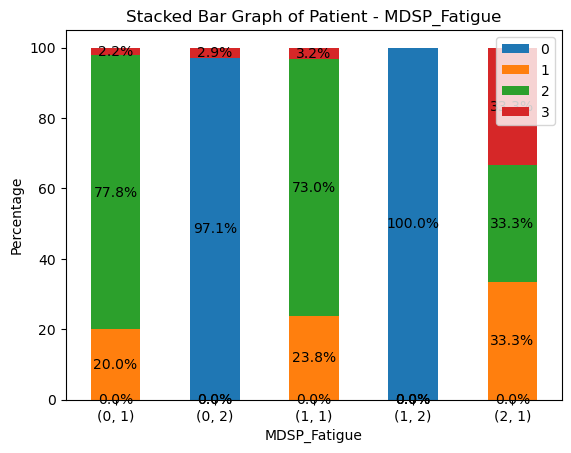

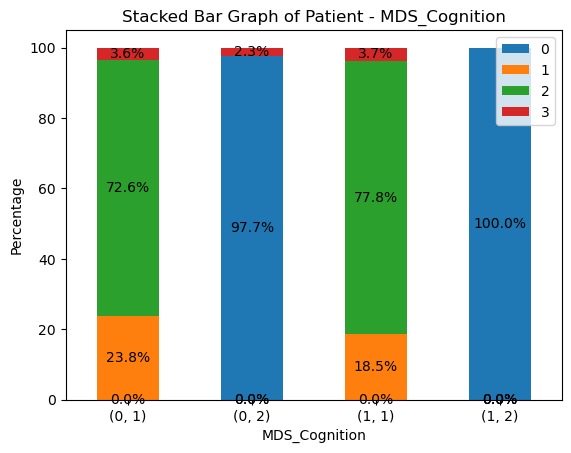

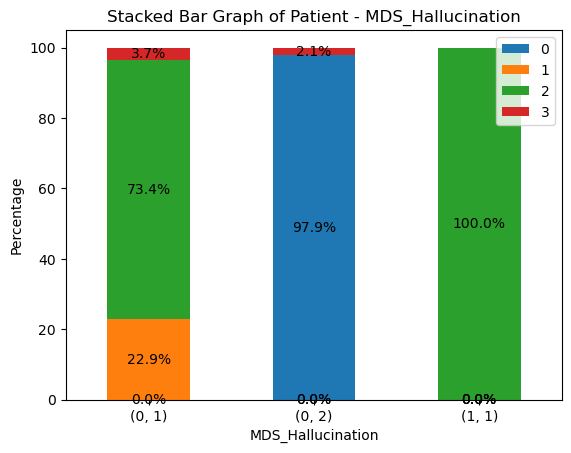

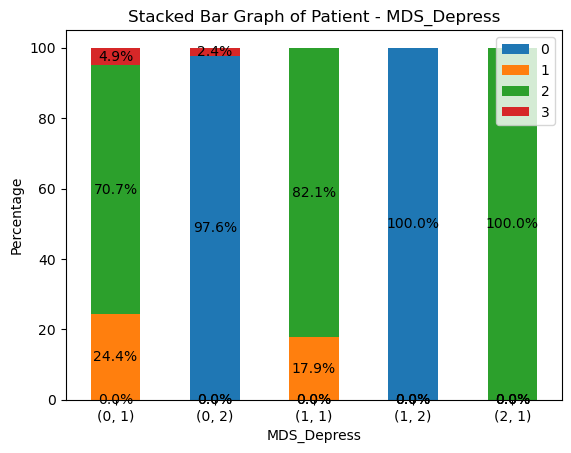

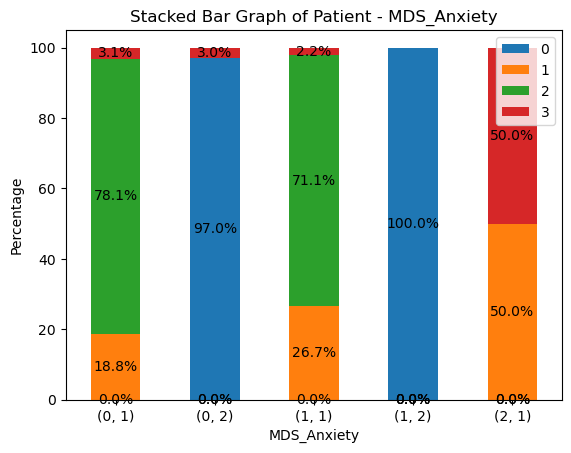

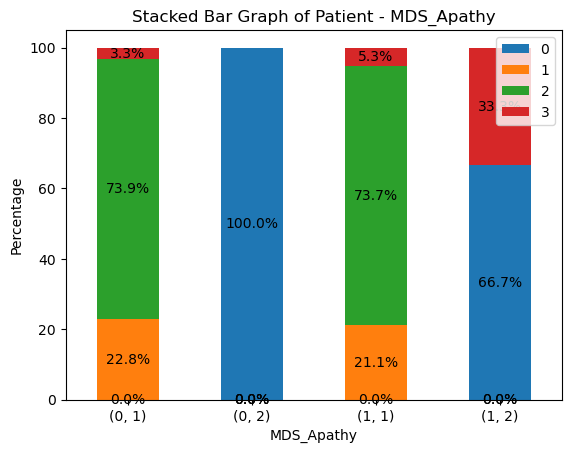

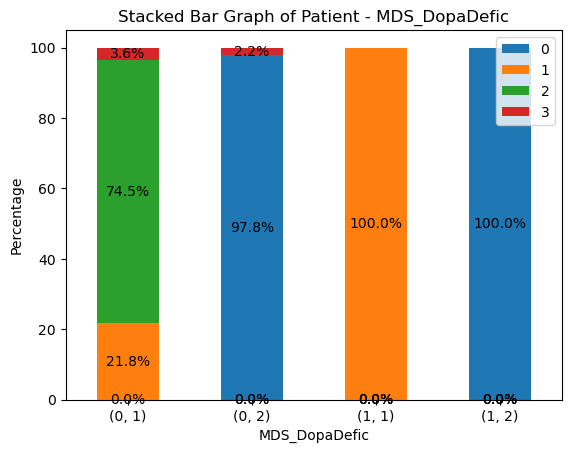

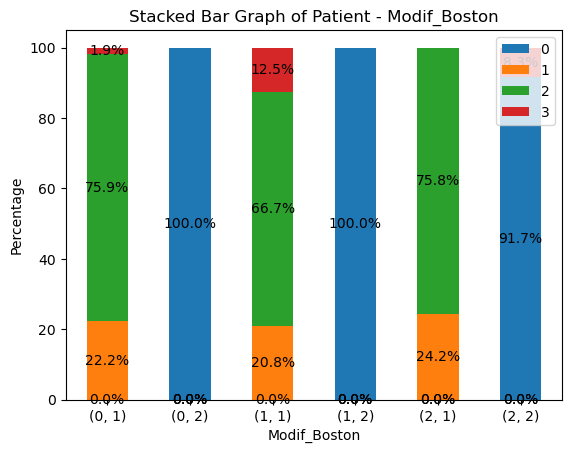

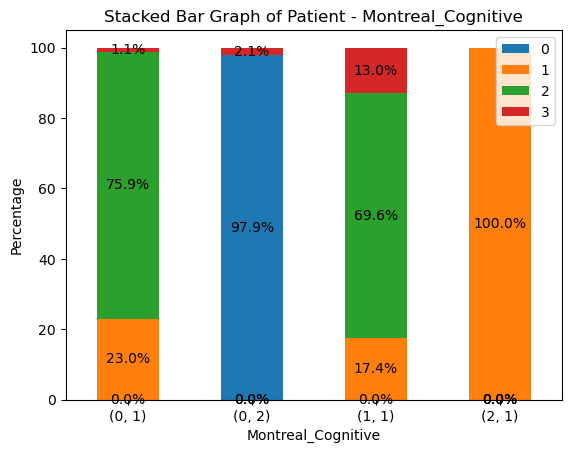

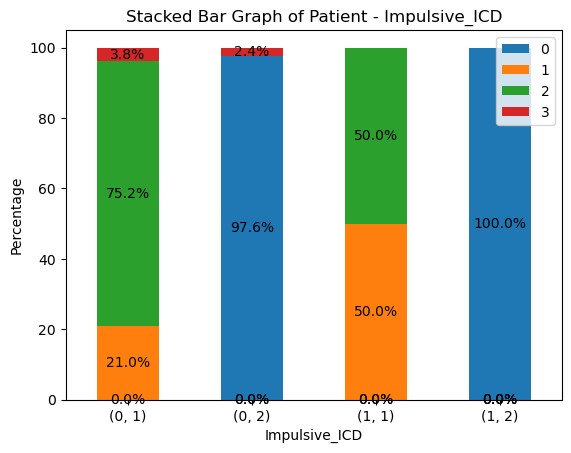

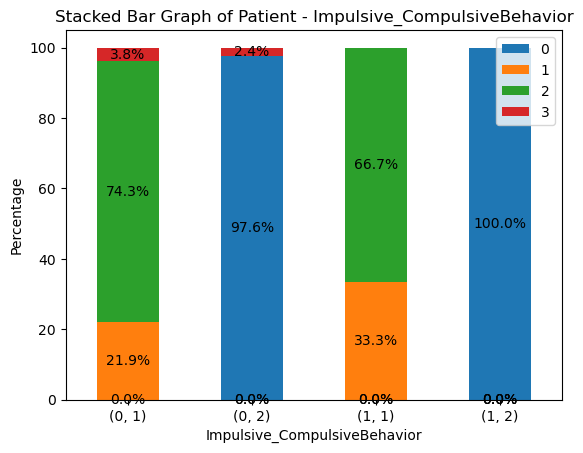

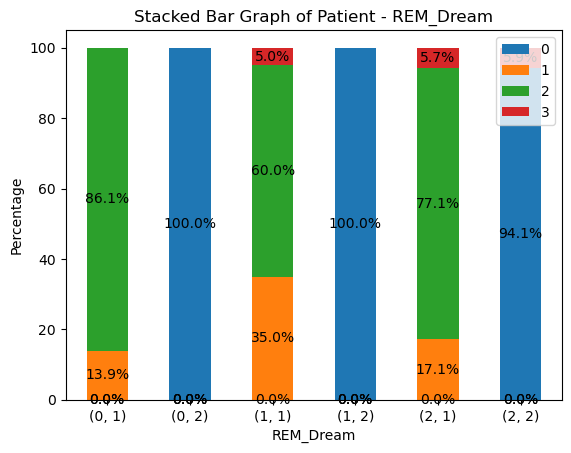

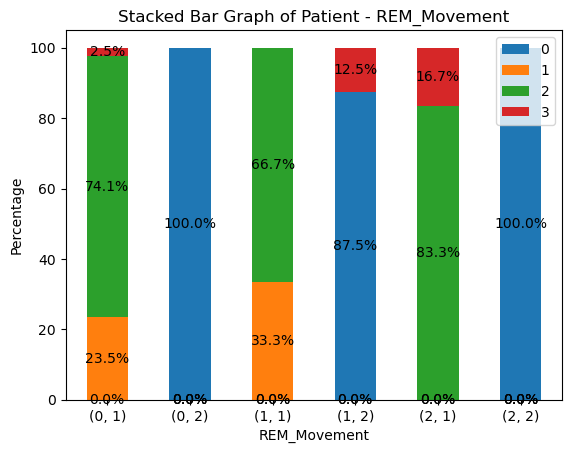

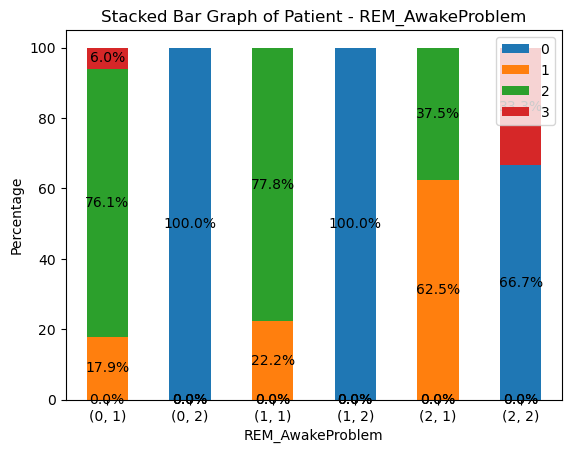

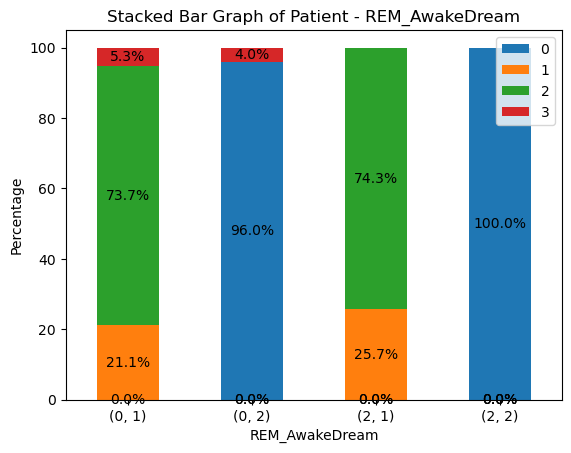

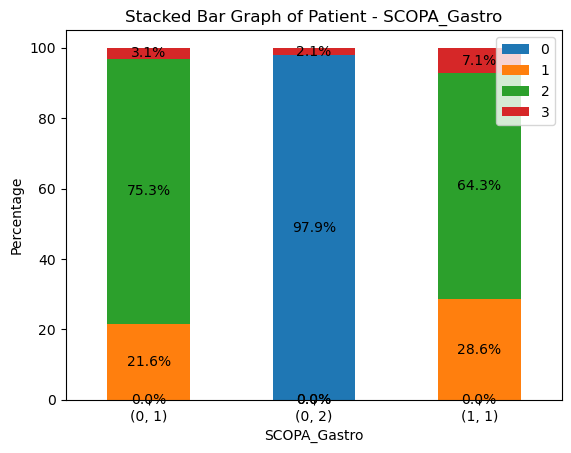

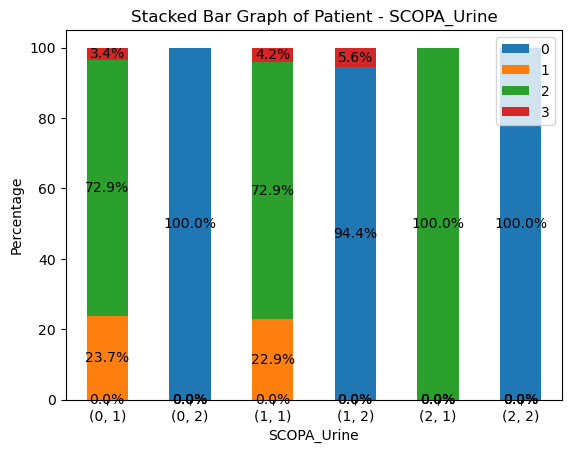

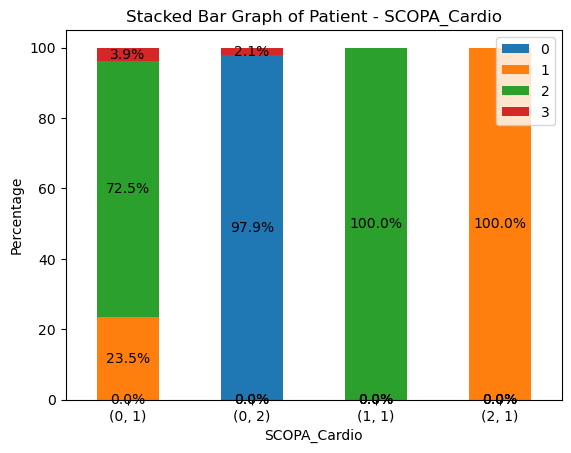

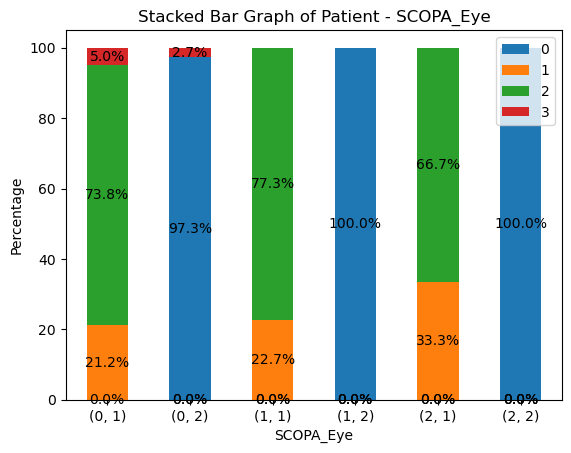

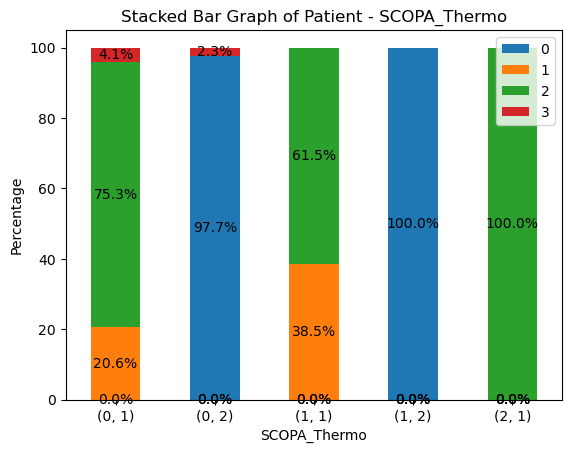

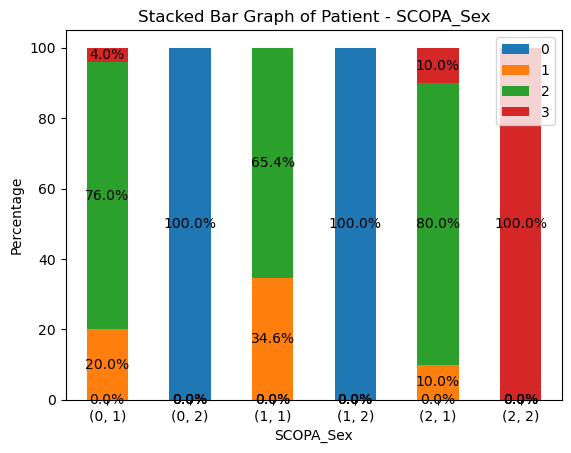

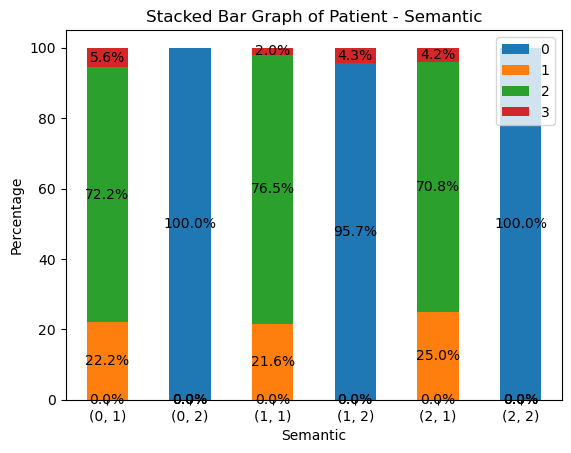

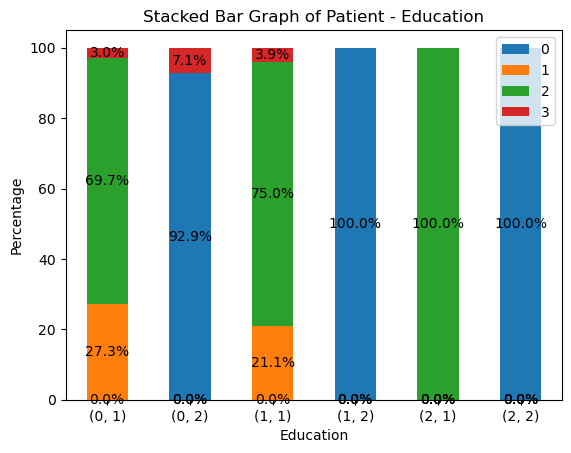

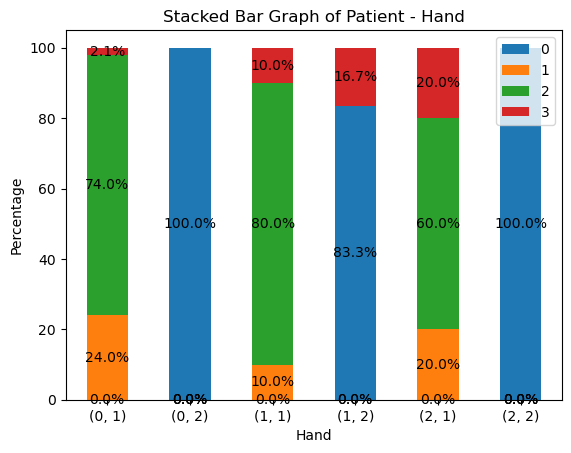

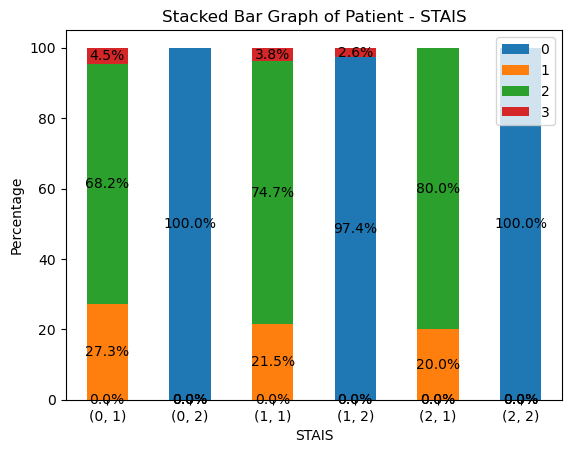

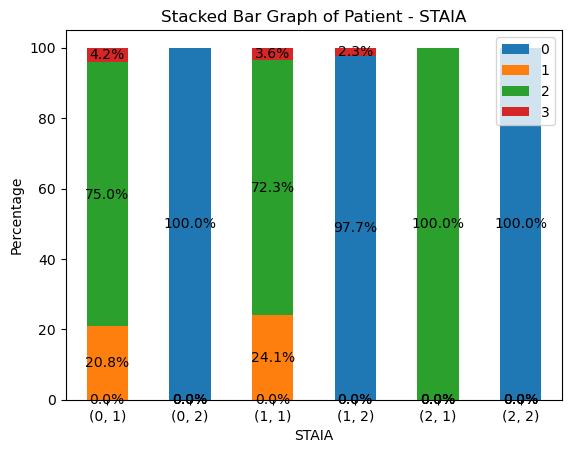

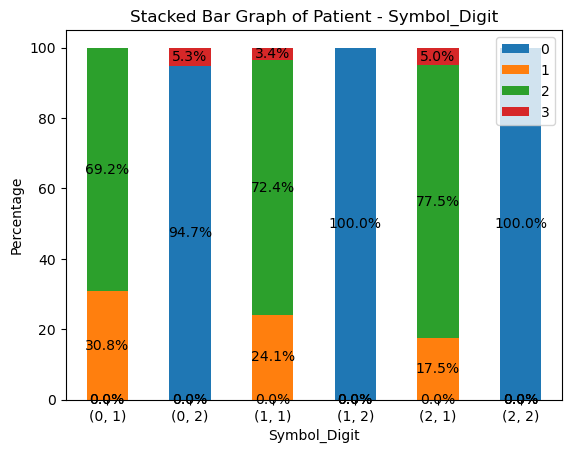

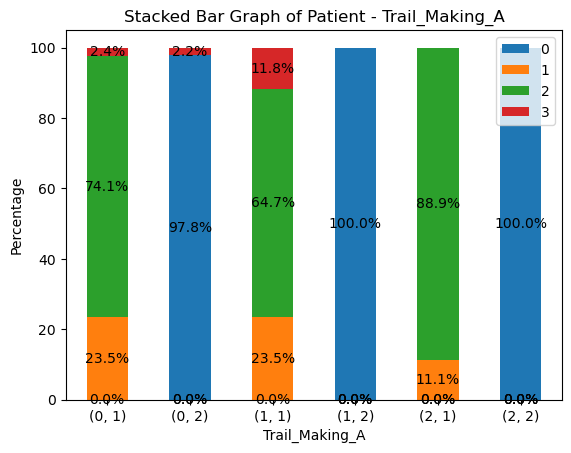

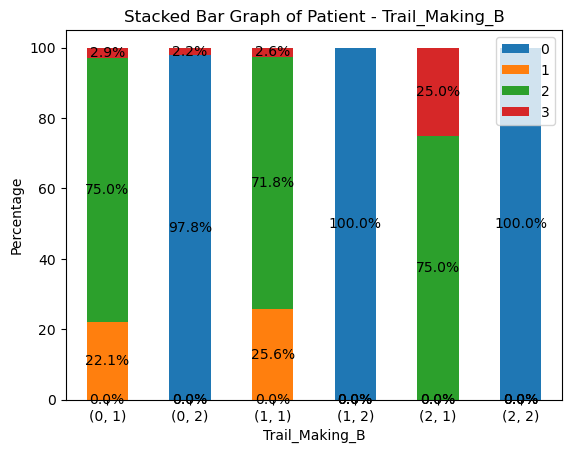

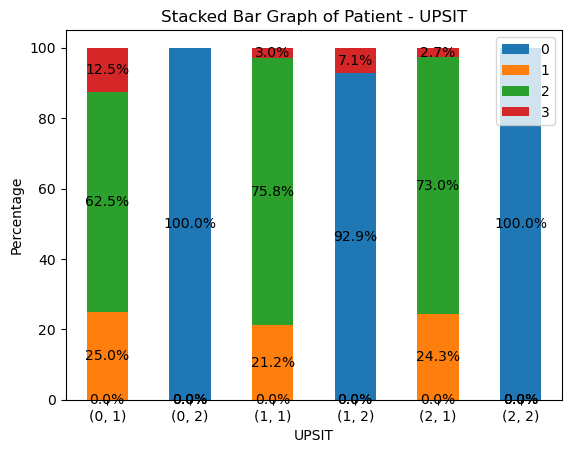

Most occurred 'HYS' for each column:
    Column APPRDX HYS Count  Benton  count  Clock  COGSTATE  Epworth  \
1   Benton      1   2   NaN     0.0   82.0    NaN       NaN      NaN   
3   Benton      1   3   NaN     1.0    1.0    NaN       NaN      NaN   
4   Benton      2   0   NaN     0.0   47.0    NaN       NaN      NaN   
1    Clock      1   2   NaN     NaN   41.0    0.0       NaN      NaN   
4    Clock      1   2   NaN     NaN   36.0    1.0       NaN      NaN   
..     ...    ...  ..   ...     ...    ...    ...       ...      ...   
4    UPSIT      1   2   NaN     NaN   50.0    NaN       NaN      NaN   
7    UPSIT      1   2   NaN     NaN   27.0    NaN       NaN      NaN   
9    UPSIT      2   0   NaN     NaN   33.0    NaN       NaN      NaN   
10   UPSIT      2   0   NaN     NaN   13.0    NaN       NaN      NaN   
12   UPSIT      2   0   NaN     NaN    1.0    NaN       NaN      NaN   

    Geriatric_Depression  ...  SCOPA_Sex  Semantic  Education  Hand  STAIS  \
1                   

In [54]:
import numpy as np

# Get unique values of the independent variables
independent_vars = df.columns[2:]

# Create an empty DataFrame to store the most occurred 'HYS' values
most_occurred_hys_df = pd.DataFrame(columns=['Column', 'APPRDX', 'HYS', 'Count'])

# Iterate over each column
for col in independent_vars:
    # Group the DataFrame by 'APPRDX', the independent variable, and 'HYS', and count occurrences
    counts = df.groupby(['APPRDX', col, 'HYS']).size().reset_index(name='count')
    
    # Find the maximum count for each value of the independent variable
    max_counts = counts.groupby(['APPRDX', col])['count'].idxmax()
    
    # Get the corresponding 'HYS' values with the maximum count
    most_occurred_hys = counts.loc[max_counts, ['APPRDX', col, 'HYS', 'count']]
    
    # Append the results to the most_occurred_hys_df
    most_occurred_hys['Column'] = col
    most_occurred_hys_df = pd.concat([most_occurred_hys_df, most_occurred_hys])

    # Create a stacked bar graph for the current column
    counts_pivot = counts.pivot(index=[col, 'APPRDX'], columns='HYS', values='count').fillna(0)
    # Calculate percentages
    percentages = counts_pivot.div(counts_pivot.sum(axis=1), axis=0) * 100
    
     # Plot the stacked bar graph
    fig, ax = plt.subplots()
    percentages.plot(kind='bar', stacked=True, ax=ax)
    
    # Add labels to the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')
    
    plt.legend(loc="upper right")
    plt.xticks(rotation=0)
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.title(f"Stacked Bar Graph of Patient - {col}")
    #plt.savefig(f"Stacked_BarGraph_Patient_{col}.svg")
    plt.show()

# Print the most occurred 'HYS' values for each column
print("Most occurred 'HYS' for each column:")
print(most_occurred_hys_df)



# Get unique values of the independent variables
independent_vars = df_H.columns[1:]

# Create an empty DataFrame to store the most occurred 'HYS' values
most_occurred_hys_df = pd.DataFrame(columns=['Column', 'HYS', 'Count'])

# Iterate over each column
for col in independent_vars:
    # Group the DataFrame by the independent variable and 'HYS', and count occurrences
    counts = df.groupby([col, 'HYS']).size().reset_index(name='count')
    
    # Find the maximum count for each value of the independent variable
    max_counts = counts.groupby(col)['count'].idxmax()
    
    # Get the corresponding 'HYS' values with the maximum count
    most_occurred_hys = counts.loc[max_counts, ['HYS', 'count']]
    
    # Append the results to the most_occurred_hys_df
    most_occurred_hys['Column'] = col
    most_occurred_hys_df = pd.concat([most_occurred_hys_df, most_occurred_hys])

    # Create a stacked bar graph for the current column
    counts_pivot = counts.pivot(index=col, columns='HYS', values='count')
    # Calculate percentages
    percentages = counts_pivot.div(counts_pivot.sum(axis=1), axis=0) * 100
    percentages.plot(kind='bar', stacked=True)
    plt.legend(loc = "upper right")
    plt.xticks(rotation=0)
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.title(f"Stacked Bar Graph of Healthy Control - {col}")
    plt.savefig(f"Stacked_BarGraph_HealthyControl_{col}.svg")
    plt.show()

# Print the most occurred 'HYS' values for each column
print("Most occurred 'HYS' for each column:")
print(most_occurred_hys_df)



# Get unique values of the independent variables
independent_vars = df_H.columns[1:]

# Create an empty DataFrame to store the most occurred 'HYS' values
most_occurred_hys_df = pd.DataFrame(columns=['Column', 'HYS', 'Count'])

# Iterate over each column
for col in independent_vars:
    # Group the DataFrame by the independent variable and 'HYS', and count occurrences
    counts = df.groupby([col, 'HYS']).size().reset_index(name='count')
    
    # Find the maximum count for each value of the independent variable
    max_counts = counts.groupby(col)['count'].idxmax()
    
    # Get the corresponding 'HYS' values with the maximum count
    most_occurred_hys = counts.loc[max_counts, ['HYS', 'count']]
    
    # Append the results to the most_occurred_hys_df
    most_occurred_hys['Column'] = col
    most_occurred_hys_df = most_occurred_hys_df.append(most_occurred_hys)

    # Create a stacked bar graph for the current column
    counts_pivot = counts.pivot(index=col, columns='HYS', values='count')
    counts_pivot.plot(kind='bar', stacked=True)
    plt.xticks(rotation=0)
    plt.xlabel(col)
    plt.ylabel('HYS')
    plt.title(f"Stacked Bar Graph - {col}")
    plt.show()

# Print the most occurred 'HYS' values for each column
print("Most occurred 'HYS' for each column:")
print(most_occurred_hys_df)
